## Python notebook template block B

As of now, you created a new notebook for every study day with the related contents. However, when working on a project in the real life, all your data and code needs to be in one place for the project. Going forward in the block, all of the code that you generate with regard to the final project about NAC and the ILO's should be in this one template. Go back to the code you wrote for the previous weeks, evaluate if it is according to [PEP8](https://peps.python.org/pep-0008/) style guide and adjust where necessary. This template provides you with a natural flow through the steps of a traditional data science project. Do not forget to clearly add comments to your code. If you would like to add more stucture, add extra mark down blocks to explain what you are doing. You are **not** allowed to remove code blocks! All blocks in here need to be filled with code. If you did not write code for a section, leave the code block as is with the pre-filled in comment. Adjust this template to your needs, make sure that all your evidence for all of the ILO's is included.

⚠️Important! Before handing it in, run all of your code. All your cells need to show outputs. This is necessary for grading!⚠️

The ILO's for which you can evidence your code by this notebook are: 

| ILO | Poor | Insufficient | Sufficient | Good | Excellent |
|-----|------|--------------|------------|------|-----------|
| 4.1 | x    | x            | x          | x    | x         |
| 4.2 | x    | x            | x          | x    | x*        |
| 5.0 | x    | x            | x          | x    | x         |
| 7.0 | x    | x            | x          | x    | x         |

4.2 excellent*: If you would like to showcast your graphs using streamlit, you need to hand in a seperate .py file. Evidence accordingly in your learning log.




### Add imports here
When working in .py files, you usually have all your package imports at the top of your code. This makes it easy to get a good overview of the packages that you are using and importing. As of now, we are working in .ipynb, but it is good practice to already start implementing these structures. Add all the imports that you use in all of your code in the code block below. In this way, you do not need to add it in every cell.

In [2]:
# Add your package imports here
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , Ridge 
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import numpy as np

# Phyton Report 

### Load the data

After your package imports, you usually load your data. This is what you will be working with and what your code will be based on.

In [3]:
fb = pd.read_csv("football_data.csv")

### Data Cleansing
In the following section plug in all of your relevant python codes and explanations related to data cleansing. This is related to the poor and insufficient criteria of ILO 4.1 and 4.2.

In [4]:
for col, val in zip(fb.columns, fb.isna().sum()):
   print(f"{col}: {val}")

Player: 0
Team: 625
Team within selected timeframe: 0
Position: 56
Age: 8
Market value: 0
Contract expires: 7064
Matches played: 0
Minutes played: 0
Goals: 0
xG: 0
Assists: 0
xA: 0
Duels per 90: 232
Duels won, %: 232
Birth country: 5
Passport country: 2
Foot: 1074
Height: 0
Weight: 0
On loan: 0
Successful defensive actions per 90: 232
Defensive duels per 90: 232
Defensive duels won, %: 232
Aerial duels per 90: 232
Aerial duels won, %: 232
Sliding tackles per 90: 232
PAdj Sliding tackles: 0
Shots blocked per 90: 232
Interceptions per 90: 232
PAdj Interceptions: 0
Fouls per 90: 232
Yellow cards: 0
Yellow cards per 90: 174
Red cards: 0
Red cards per 90: 174
Successful attacking actions per 90: 232
Goals per 90: 174
Non-penalty goals: 0
Non-penalty goals per 90: 232
xG per 90: 232
Head goals: 0
Head goals per 90: 232
Shots: 0
Shots per 90: 232
Shots on target, %: 232
Goal conversion, %: 0
Assists per 90: 232
Crosses per 90: 232
Accurate crosses, %: 232
Crosses from left flank per 90: 232
A

In [5]:
fb = fb[~fb["Position"].isna()]

In [6]:
fb = fb[~fb["Age"].isna()]

In [7]:
fb = fb[~fb["Duels per 90"].isna()]

In [8]:
fb2 = fb["Position"].str.get_dummies(", ")

In [9]:
for col, val in zip(fb.columns, fb.isna().sum()):
   print(f"{col}: {val}")

Player: 0
Team: 618
Team within selected timeframe: 0
Position: 0
Age: 0
Market value: 0
Contract expires: 6876
Matches played: 0
Minutes played: 0
Goals: 0
xG: 0
Assists: 0
xA: 0
Duels per 90: 0
Duels won, %: 0
Birth country: 2
Passport country: 0
Foot: 1001
Height: 0
Weight: 0
On loan: 0
Successful defensive actions per 90: 0
Defensive duels per 90: 0
Defensive duels won, %: 0
Aerial duels per 90: 0
Aerial duels won, %: 0
Sliding tackles per 90: 0
PAdj Sliding tackles: 0
Shots blocked per 90: 0
Interceptions per 90: 0
PAdj Interceptions: 0
Fouls per 90: 0
Yellow cards: 0
Yellow cards per 90: 0
Red cards: 0
Red cards per 90: 0
Successful attacking actions per 90: 0
Goals per 90: 0
Non-penalty goals: 0
Non-penalty goals per 90: 0
xG per 90: 0
Head goals: 0
Head goals per 90: 0
Shots: 0
Shots per 90: 0
Shots on target, %: 0
Goal conversion, %: 0
Assists per 90: 0
Crosses per 90: 0
Accurate crosses, %: 0
Crosses from left flank per 90: 0
Accurate crosses from left flank, %: 0
Crosses fro

In [10]:


# Merge fb and fb2 based on the index
df = pd.concat([fb, fb2], axis=1)
# Drop the original "Position" column

### Exploratory Data Analysis

Include all exploratory Data Analysis questions you studied in this section. This is related to the sufficient and good criteria of ILO 4.1 and 4.2. 

#### Correlation Analysis and Feature Selection


Forwards

In [11]:
# Filter rows where the "CF" column is equal to 1
Forward = df[df['CF'] == 1]

# Display the result
forward_df = Forward[['Player', 'Team within selected timeframe', 'Age', 'Market value', 'Contract expires',
'Matches played', 'Minutes played', 'Goals', 'xG',"Goals per 90", 'Assists',"xA", 'Shots', 'Shots per 90', "Height",
'Shots on target, %', 'Goal conversion, %', 'Assists per 90',
'Dribbles per 90', 'Touches in box per 90', "Successful dribbles, %", "Received long passes per 90",
"Received passes per 90", "Progressive runs per 90","Head goals", "Head goals per 90","Successful attacking actions per 90",
"Non-penalty goals", "Non-penalty goals per 90","Offensive duels per 90", "Fouls suffered per 90"]] 

Goalkeepers

In [12]:
# Filter rows where the "GK" column is equal to 1
Goalkeepers = df[df["GK"]== 1]
# Display the result and determine usefull features 
goalkeepers_df = Goalkeepers[['Player', 'Team within selected timeframe', 'Age', 'Market value', 'Contract expires', 'Matches played', 'Minutes played', 
"Conceded goals per 90", "Shots against per 90", "Prevented goals", "Prevented goals per 90", "Exits per 90","Clean sheets","Save rate, %",
"xG against", "xG against per 90",
"Aerial duels per 90.1", "Accurate short / medium passes, %", "Accurate long passes, %","Long passes per 90", "Passes per 90"]] 

Attacking midfielders

In [13]:
attacking_midfielder_positions = df[(df["AMF"]== 1) | (df['LAMF']== 1 ) | (df['RAMF']== 1 )]
atacking_midfieldrs_df = attacking_midfielder_positions[['Player', 'Team within selected timeframe', 'Age', 'Market value', 'Contract expires',
'Matches played', 'Minutes played', 'Goals', 'xG', 'Assists',"xA",'xA per 90', 'Shots',"Goals per 90",
'Shots per 90',"Non-penalty goals","Successful attacking actions per 90",
"Non-penalty goals per 90",
'Shots on target, %', 'Goal conversion, %', 'Assists per 90', "Passes to final third per 90",
"Accurate passes to final third, %","Fouls suffered per 90", "Received long passes per 90","Received passes per 90", 
"Progressive runs per 90","Successful attacking actions per 90",
'Dribbles per 90', 'Touches in box per 90', "Successful dribbles, %","Key passes per 90",
"Passes per 90","Accurate passes, %", "Forward passes per 90", "Accurate forward passes, %", "Progressive passes per 90",
"Accurate progressive passes, %", "Accurate passes to penalty area, %", "Shot assists per 90"]]

Central Midfielders

In [14]:
central_midfielders_positions = df[(df["RCMF"]== 1) | (df['LCMF']== 1 )]
central_midfielders_df = central_midfielders_positions[['Player', 'Team within selected timeframe', 'Age', 'Market value', 'Contract expires',
'Matches played', 'Minutes played', 'Goals', 'xG', 'Assists',"xA",'xA per 90', 'Shots',"Goals per 90",
'Shots per 90',"Non-penalty goals","Successful attacking actions per 90",'Forward passes per 90', 'Accurate passes, %',
"Non-penalty goals per 90",
'Shots on target, %', 'Goal conversion, %', 'Assists per 90', "Back passes per 90",
"Accurate back passes, %", "Short / medium passes per 90",
"Accurate short / medium passes, %",
"Long passes per 90",
"Accurate long passes, %",
"Average pass length, m",
"Average long pass length, m",
"Second assists per 90",
"Third assists per 90",
"Smart passes per 90",
"Accurate smart passes, %",
"Key passes per 90",
"Passes to final third per 90",
"Accurate passes to final third, %",
"Passes to penalty area per 90",
"Accurate passes to penalty area, %",
"Through passes per 90",
"Accurate through passes, %",
"Progressive passes per 90",
"Accurate progressive passes, %","Progressive runs per 90"]]

Defensive Midfielders

In [15]:
defensive_midfielder_positions = df[(df["DMF"]== 1) | (df['LDMF']== 1 ) | (df['RDMF']== 1 )]
defensive_midfieders_df = defensive_midfielder_positions[['Player', 'Team within selected timeframe', 'Age', 'Market value', 'Contract expires',
'Matches played', 'Minutes played',"Passes per 90",
"Accurate passes, %",
"Forward passes per 90",
"Accurate forward passes, %",
"Back passes per 90",
"Accurate back passes, %", "Short / medium passes per 90",
"Accurate short / medium passes, %",
"Long passes per 90",
"Accurate long passes, %",
"Average pass length, m",
"Average long pass length, m",
"Second assists per 90",
"Third assists per 90",
"Smart passes per 90",
"Accurate smart passes, %",
"Key passes per 90",
"Passes to final third per 90",
"Accurate passes to final third, %",
"Passes to penalty area per 90",
"Accurate passes to penalty area, %",
"Through passes per 90",
"Accurate through passes, %",
"Progressive passes per 90",
"Accurate progressive passes, %","Progressive runs per 90",
"Successful defensive actions per 90",
"Defensive duels per 90",
"Defensive duels won, %",
"Aerial duels per 90",
"Aerial duels won, %",
"Sliding tackles per 90",
"PAdj Sliding tackles",
"Shots blocked per 90",
"Interceptions per 90",
"PAdj Interceptions",
"Fouls per 90",
"Yellow cards",
"Yellow cards per 90",
"Red cards",
"Red cards per 90"]]

Wingers

In [16]:
winger_positions = df[(df["LW"]== 1) | (df['LWF']== 1 ) | (df['RW']== 1 ) | (df['RWF']== 1 )]
wingers_df = winger_positions[['Player', 'Team within selected timeframe', 'Age', 'Market value', 'Contract expires',
'Matches played', 'Minutes played', 'Goals', 'xG',"Goals per 90", 'Assists',"xA", 'Shots', 'Shots per 90',
'Shots on target, %', 'Goal conversion, %', 'Assists per 90', "Accurate crosses, %",
'Dribbles per 90', 'Touches in box per 90', "Successful dribbles, %", "Received long passes per 90",
"Received passes per 90", "Progressive runs per 90","Successful attacking actions per 90",
"Non-penalty goals", "Non-penalty goals per 90","Key passes per 90",
"Passes per 90","Accurate passes, %", "Forward passes per 90", "Accurate forward passes, %", "Progressive passes per 90",
"Accurate progressive passes, %", "Accurate passes to penalty area, %", "Shot assists per 90","Crosses from left flank per 90",
"Accurate crosses from left flank, %",
"Crosses from right flank per 90", "Crosses per 90",
"Accurate crosses from right flank, %",
"Fouls suffered per 90",
"Back passes per 90",
"Accurate back passes, %",
"Lateral passes per 90",
"Accurate lateral passes, %",
"Short / medium passes per 90",
"Accurate short / medium passes, %",
"Long passes per 90",
"Accurate long passes, %",
"Average pass length, m",
"Average long pass length, m"]]

Central backs 

In [17]:
Central_backs = df[(df["CB"]== 1) | (df['LCB']== 1 ) | (df['RCB']== 1 )]
Central_backs_df = Central_backs[['Player', 'Team within selected timeframe', 'Age', 'Market value', 'Contract expires',
'Matches played', 'Minutes played',"Passes per 90","Height","Head goals", "Head goals per 90",
"Accurate passes, %", 
"Forward passes per 90",
"Accurate forward passes, %",
"Back passes per 90",
"Accurate back passes, %", "Short / medium passes per 90",
"Accurate short / medium passes, %",
"Long passes per 90",
"Accurate long passes, %",
"Average pass length, m",
"Average long pass length, m",
"Through passes per 90",
"Accurate through passes, %",
"Progressive passes per 90",
"Accurate progressive passes, %",
"Successful defensive actions per 90",
"Defensive duels per 90",
"Defensive duels won, %",
"Aerial duels per 90",
"Aerial duels won, %",
"Sliding tackles per 90",
"PAdj Sliding tackles",
"Shots blocked per 90",
"Interceptions per 90",
"PAdj Interceptions",
"Fouls per 90",
"Yellow cards",
"Yellow cards per 90",
"Red cards",
"Red cards per 90"]]

Becks

In [18]:
becks = df[(df["LB"]== 1) | (df['LWB']== 1 ) | (df['RWB']== 1 ) | (df['RB']== 1 )]
becks_df = becks[['Player', 'Team within selected timeframe', 'Age', 'Market value', 'Contract expires',
'Matches played', 'Minutes played',"Passes per 90",'Goals', 'xG',"Goals per 90", 'Assists',"xA", 'Shots', 'Shots per 90',
'Shots on target, %', 'Goal conversion, %', 'Assists per 90', "Accurate crosses, %", "Lateral passes per 90",
"Accurate passes, %",
"Forward passes per 90",
"Accurate forward passes, %",
"Back passes per 90",
"Accurate back passes, %", "Short / medium passes per 90",
"Accurate short / medium passes, %",
"Long passes per 90",
"Accurate long passes, %",
"Average pass length, m",
"Average long pass length, m",
"Through passes per 90",
"Accurate through passes, %",
"Progressive passes per 90",
"Accurate progressive passes, %","Progressive runs per 90",
"Successful defensive actions per 90",
"Defensive duels per 90",
"Defensive duels won, %",
"Aerial duels per 90",
"Aerial duels won, %",
"Sliding tackles per 90",
"PAdj Sliding tackles",
"Shots blocked per 90",
"Interceptions per 90",
"PAdj Interceptions",
"Fouls per 90",
"Yellow cards",
"Yellow cards per 90",
"Red cards",
"Red cards per 90"]]

In [19]:
# All of the Breda players 

becks_Breda = becks_df.loc[becks_df['Team within selected timeframe'] == "NAC Breda"]
Central_Breda = Central_backs_df.loc[Central_backs_df['Team within selected timeframe'] == "NAC Breda"]
wingers_Breda = wingers_df.loc[wingers_df['Team within selected timeframe'] == "NAC Breda"]
defensive_midfieders_Breda = defensive_midfieders_df.loc[defensive_midfieders_df['Team within selected timeframe'] == "NAC Breda"]
Central_midfielders_Breda = central_midfielders_df.loc[central_midfielders_df['Team within selected timeframe'] == "NAC Breda"]
atacking_MF_Breda = atacking_midfieldrs_df.loc[atacking_midfieldrs_df['Team within selected timeframe'] == "NAC Breda"]
goalkepers_Breda = goalkeepers_df.loc[goalkeepers_df['Team within selected timeframe'] == "NAC Breda"]
forward_Breda = forward_df.loc[forward_df['Team within selected timeframe'] == "NAC Breda"]

In [20]:
# All of the PEC Zwolle players 

becks_Zwolle = becks_df.loc[becks_df['Team within selected timeframe'] == "PEC Zwolle"]
Central_Zwolle = Central_backs_df.loc[Central_backs_df['Team within selected timeframe'] == "PEC Zwolle"]
wingers_Zwolle = wingers_df.loc[wingers_df['Team within selected timeframe'] == "PEC Zwolle"]
defensive_midfieders_Zwolle = defensive_midfieders_df.loc[defensive_midfieders_df['Team within selected timeframe'] == "PEC Zwolle"]
Central_midfielders_Zwolle = central_midfielders_df.loc[central_midfielders_df['Team within selected timeframe'] == "PEC Zwolle"]
atacking_MF_Zwolle = atacking_midfieldrs_df.loc[atacking_midfieldrs_df['Team within selected timeframe'] == "PEC Zwolle"]
goalkepers_Zwolle = goalkeepers_df.loc[goalkeepers_df['Team within selected timeframe'] == "PEC Zwolle"]
forward_Zwolle = forward_df.loc[forward_df['Team within selected timeframe'] == "PEC Zwolle"]

In [21]:
# All of the Heracles players 

becks_Heracles = becks_df.loc[becks_df['Team within selected timeframe'] == "Heracles"]
Central_Heracles = Central_backs_df.loc[Central_backs_df['Team within selected timeframe'] == "Heracles"]
wingers_Heracles = wingers_df.loc[wingers_df['Team within selected timeframe'] == "Heracles"]
defensive_midfieders_Heracles = defensive_midfieders_df.loc[defensive_midfieders_df['Team within selected timeframe'] == "Heracles"]
Central_midfielders_Heracles = central_midfielders_df.loc[central_midfielders_df['Team within selected timeframe'] == "Heracles"]
atacking_MF_Heracles = atacking_midfieldrs_df.loc[atacking_midfieldrs_df['Team within selected timeframe'] == "Heracles"]
goalkepers_Heracles = goalkeepers_df.loc[goalkeepers_df['Team within selected timeframe'] == "Heracles"]
forward_Heracles = forward_df.loc[forward_df['Team within selected timeframe'] == "Heracles"]

In [22]:
# All of the Almere_City players 
becks_Almere_City = becks_df.loc[becks_df['Team within selected timeframe'] == "Almere City"]
Central_Almere_City = Central_backs_df.loc[Central_backs_df['Team within selected timeframe'] == "Almere City"]
wingers_Almere_City = wingers_df.loc[wingers_df['Team within selected timeframe'] == "Almere City"]
defensive_midfieders_Almere_City = defensive_midfieders_df.loc[defensive_midfieders_df['Team within selected timeframe'] == "Almere City"]
Central_midfielders_Almere_City = central_midfielders_df.loc[central_midfielders_df['Team within selected timeframe'] == "Almere City"]
atacking_MF_Almere_City = atacking_midfieldrs_df.loc[atacking_midfieldrs_df['Team within selected timeframe'] == "Almere City"]
goalkepers_Almere_City = goalkeepers_df.loc[goalkeepers_df['Team within selected timeframe'] == "Almere City"]
forward_Almere_City = forward_df.loc[forward_df['Team within selected timeframe'] == "Almere City"]

In [23]:
Becks = [becks_Almere_City, becks_Heracles, becks_Zwolle, becks_Breda]
Central_backs = [Central_Almere_City, Central_Heracles, Central_Zwolle, Central_Breda]
wingers = [wingers_Almere_City, wingers_Heracles, wingers_Zwolle, wingers_Breda]
defensive_midfieders = [defensive_midfieders_Almere_City, defensive_midfieders_Heracles, defensive_midfieders_Zwolle, defensive_midfieders_Breda]
Central_midfielders = [Central_midfielders_Almere_City, Central_midfielders_Heracles, Central_midfielders_Zwolle, Central_midfielders_Breda]
atacking_MF = [atacking_MF_Almere_City, atacking_MF_Heracles, atacking_MF_Zwolle, atacking_MF_Breda]
goalkepers = [goalkepers_Almere_City, goalkepers_Heracles ,goalkepers_Zwolle,goalkepers_Breda, ]
forwards = [forward_Almere_City, forward_Heracles, forward_Zwolle , forward_Breda]

In [24]:
features_1 =  ['Age',  
'Matches played', 'Minutes played',"Passes per 90","Height","Head goals", "Head goals per 90",
"Accurate passes, %",
"Forward passes per 90",
"Accurate forward passes, %",
"Back passes per 90",
"Accurate back passes, %", "Short / medium passes per 90",
"Accurate short / medium passes, %",
"Long passes per 90",
"Accurate long passes, %",
"Average pass length, m",
"Average long pass length, m",
"Through passes per 90",
"Accurate through passes, %",
"Progressive passes per 90",
"Accurate progressive passes, %",
"Defensive duels per 90",
"Defensive duels won, %",
"Aerial duels per 90",
"Aerial duels won, %",
"Sliding tackles per 90",
"PAdj Sliding tackles",
"Shots blocked per 90",
"Interceptions per 90",
"PAdj Interceptions",
"Fouls per 90",
"Yellow cards",
"Yellow cards per 90",
"Red cards",
"Red cards per 90"]
central_defenders = pd.concat (Central_backs)
X_iteration = central_defenders[features_1]
scaler = StandardScaler()
X_iteration1 = scaler.fit_transform(X_iteration)

y_iteration1 = central_defenders["Successful defensive actions per 90"]

# Training and Testing
X_train_iter1, X_test_iter1, y_train_iter1, y_test_iter1 = train_test_split(X_iteration1, y_iteration1, test_size=0.2, random_state=42)

# Create a linear regression model
model_iter1 = Ridge()

# Train the model
model_iter1.fit(X_train_iter1, y_train_iter1)

# Testing the model
y_pred_iter1 = model_iter1.predict(X_test_iter1)

# Evaluation
mse_iter1 = mean_squared_error(y_test_iter1, y_pred_iter1)
print("Mean Squared Error (Iteration 1):", mse_iter1)
coefficients_iter1 = pd.DataFrame({"Feature": features_1, "Coefficient": model_iter1.coef_})
coefficients_iter1.sort_values(by ="Coefficient" )


Mean Squared Error (Iteration 1): 1.0571117055993402


,Feature,Coefficient
15,"Accurate long passes, %",-0.195546
0,Age,-0.155117
18,Through passes per 90,-0.152264
11,"Accurate back passes, %",-0.130965
1,Matches played,-0.116472
21,"Accurate progressive passes, %",-0.104694
2,Minutes played,-0.085912
10,Back passes per 90,-0.047842
7,"Accurate passes, %",-0.046282
6,Head goals per 90,-0.037158


### Visualizations

Include all the visualizations you made in this section. This is related to the excellent criteria of ILO 4.2. Use the blocks below to enter the code for graphs you created with matplotlib (or seaborn, bokeh, or another visualization package). 

❗ If you would like to showcast your visualizations using streamlit, you need to hand in a seperate .py file for this. It is not possible to run streamlit code from a python notebook. Please note down below if you do so.

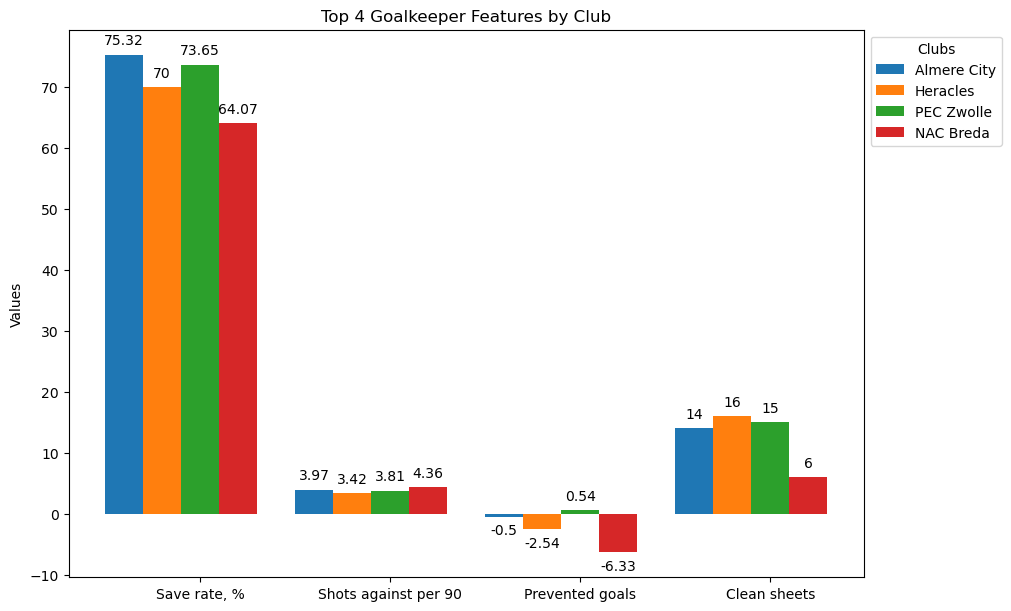

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# List of clubs
clubs = ["Almere City", "Heracles", "PEC Zwolle", "NAC Breda"]

# Dictionary of goalkeeper dataframes for each club
goalkeepers_data = {"Almere City": goalkepers_Almere_City, "Heracles": goalkepers_Heracles, "PEC Zwolle": goalkepers_Zwolle, "NAC Breda": goalkepers_Breda}

# List of top 5 features for goalkeepers
top_features = ["Save rate, %", "Shots against per 90", "Prevented goals", "Clean sheets"]

# Set up the figure and axes with a larger size
fig, ax = plt.subplots(figsize=(10, 6), constrained_layout=True)

# Set the positions for each group of bars
x = np.arange(len(clubs))
width = 0.2  # the width of the bars

# Iterate through each club and plot the top 5 features for goalkeepers
for i, club in enumerate(clubs):
    goalkeeper_df = goalkeepers_data[club]
    offset = width * i
    rects = ax.bar(x + offset, goalkeeper_df[top_features].mean().values, width, label=club)
    ax.bar_label(rects, padding=5)

# Add some text for labels, title, and custom x-axis tick labels
ax.set_ylabel('Values')
ax.set_title('Top 4 Goalkeeper Features by Club')
ax.set_xticks(x + (width * len(clubs) / 2))
ax.set_xticklabels(top_features)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Clubs')

plt.show()


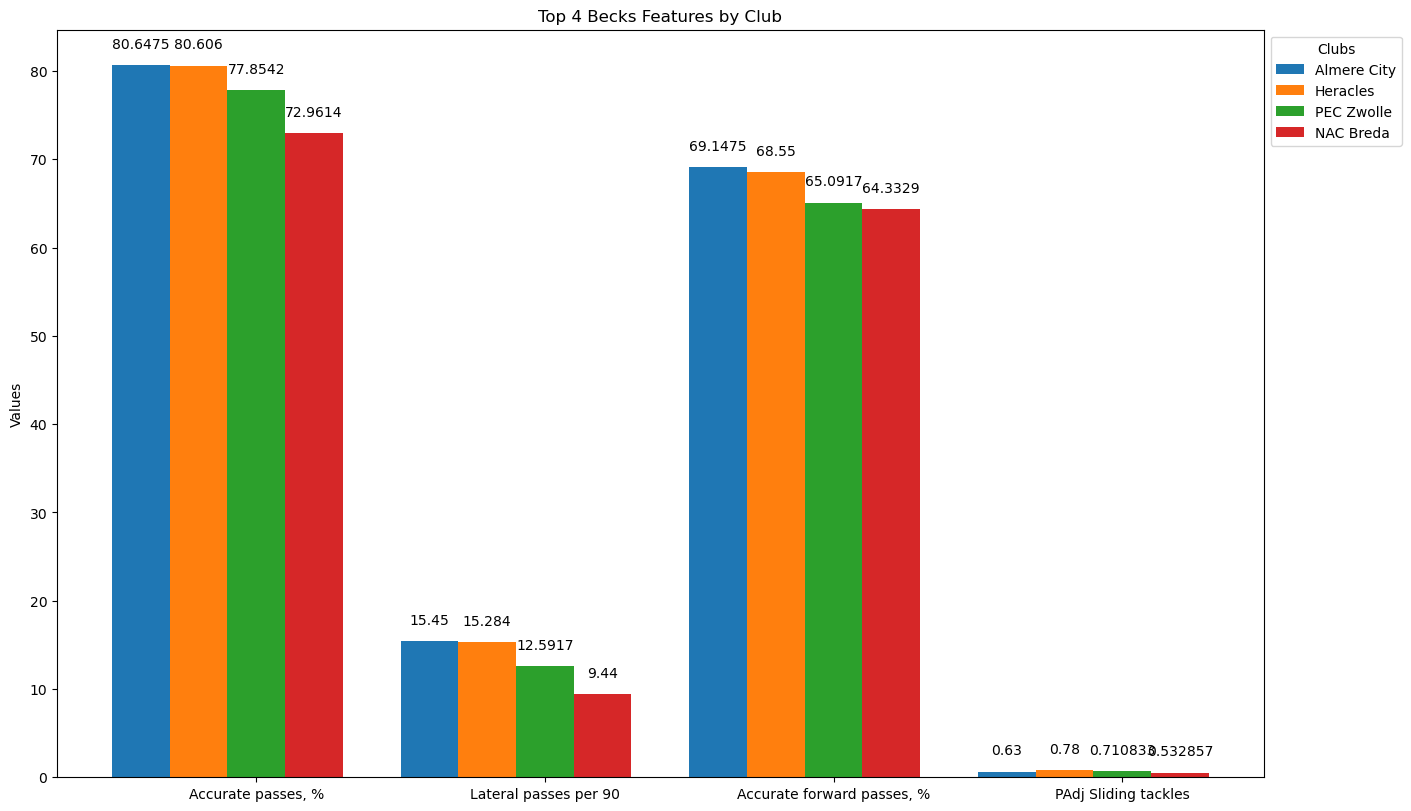

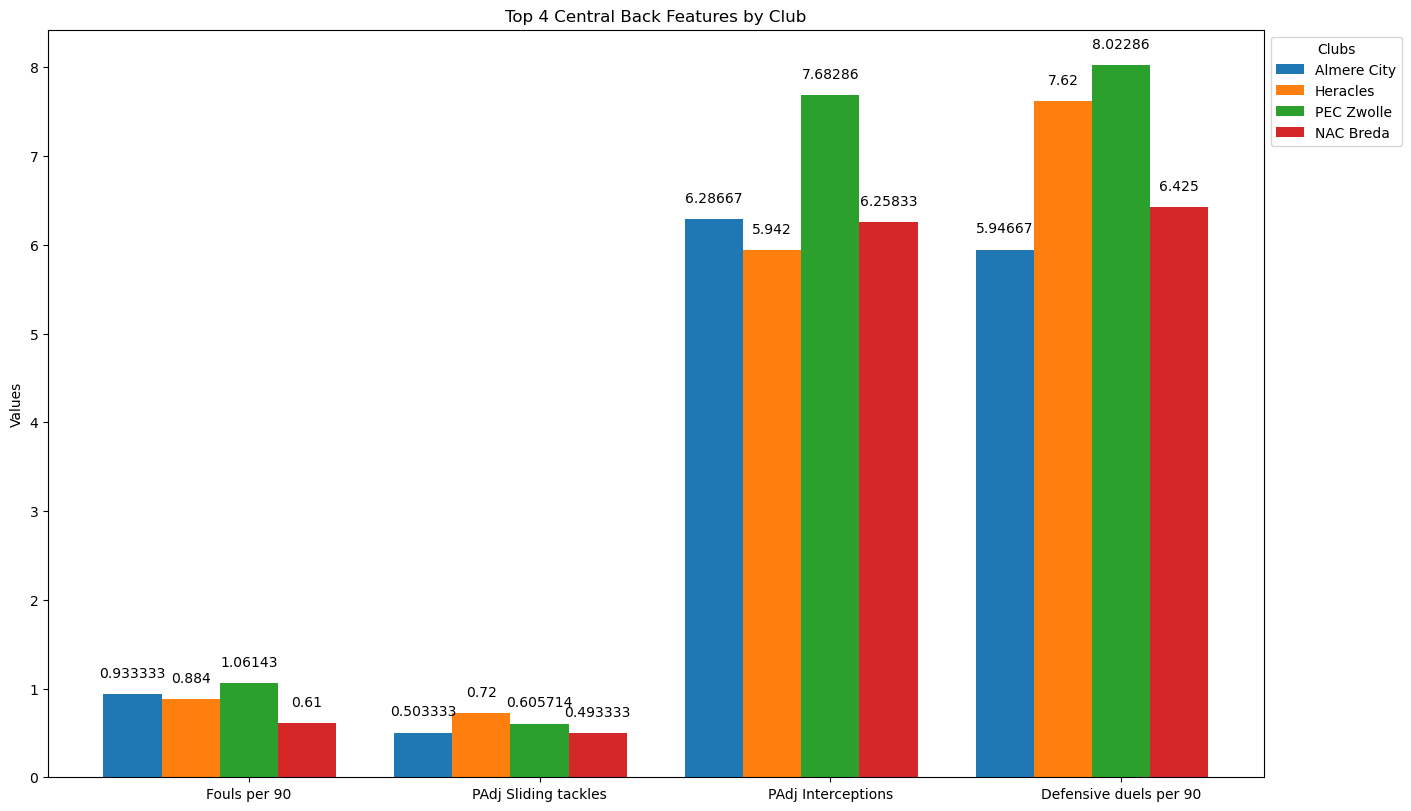

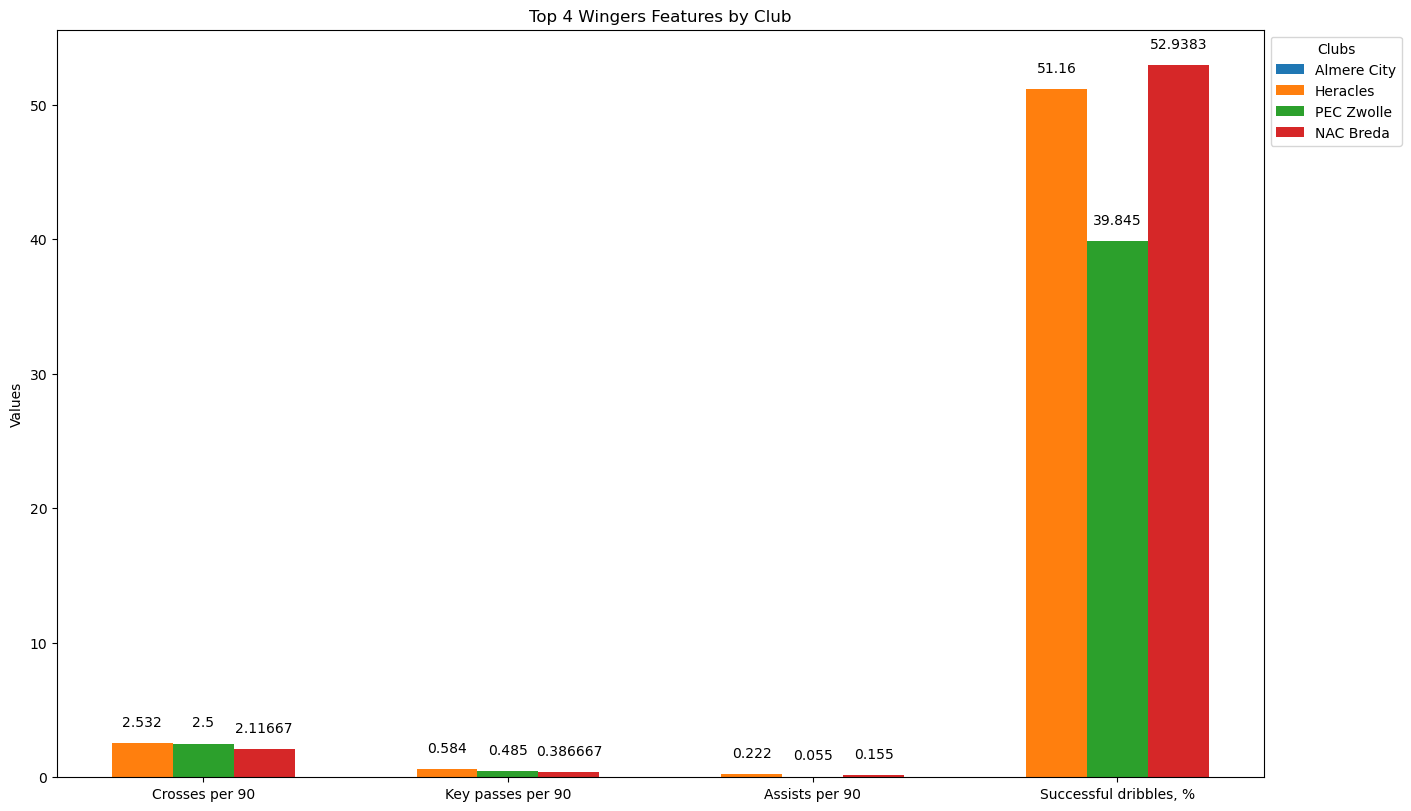

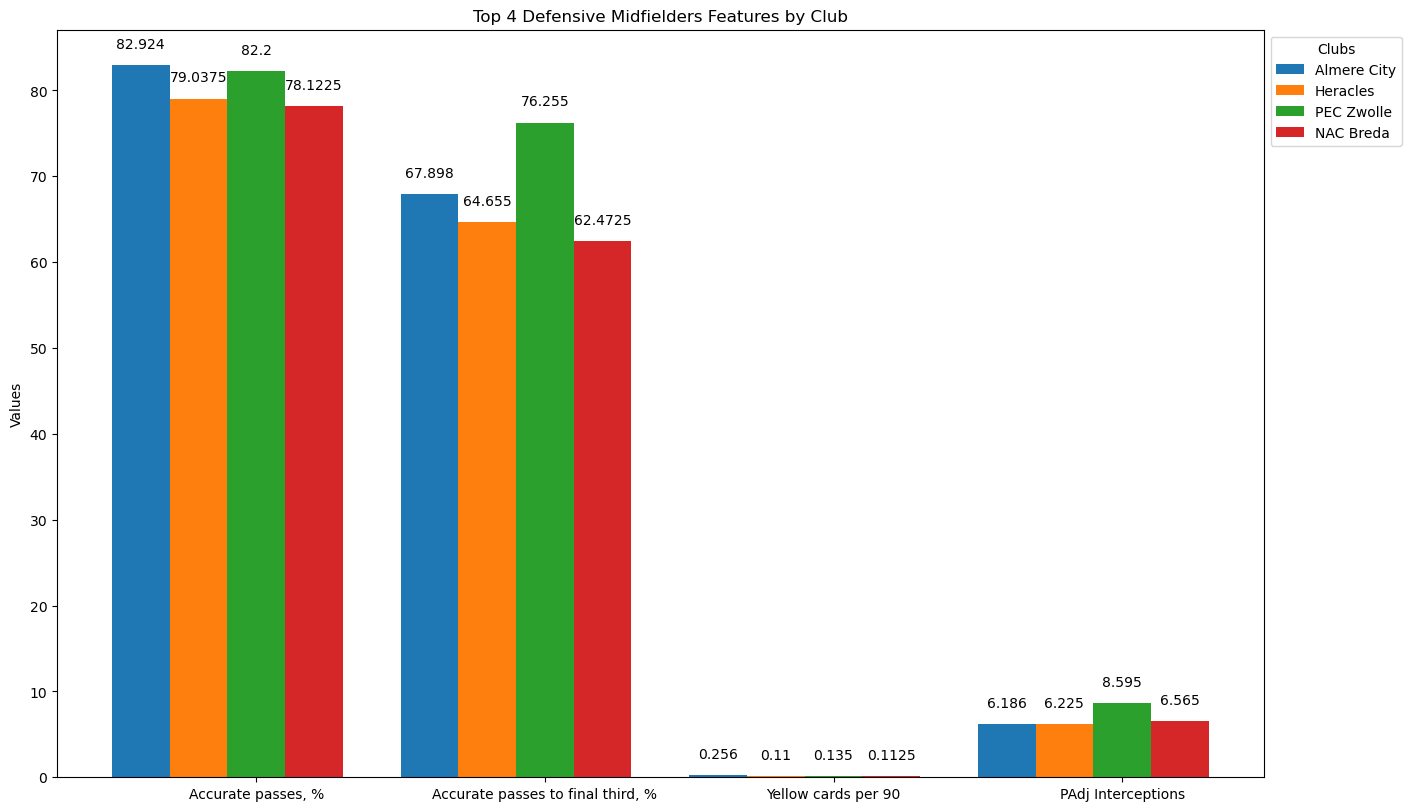

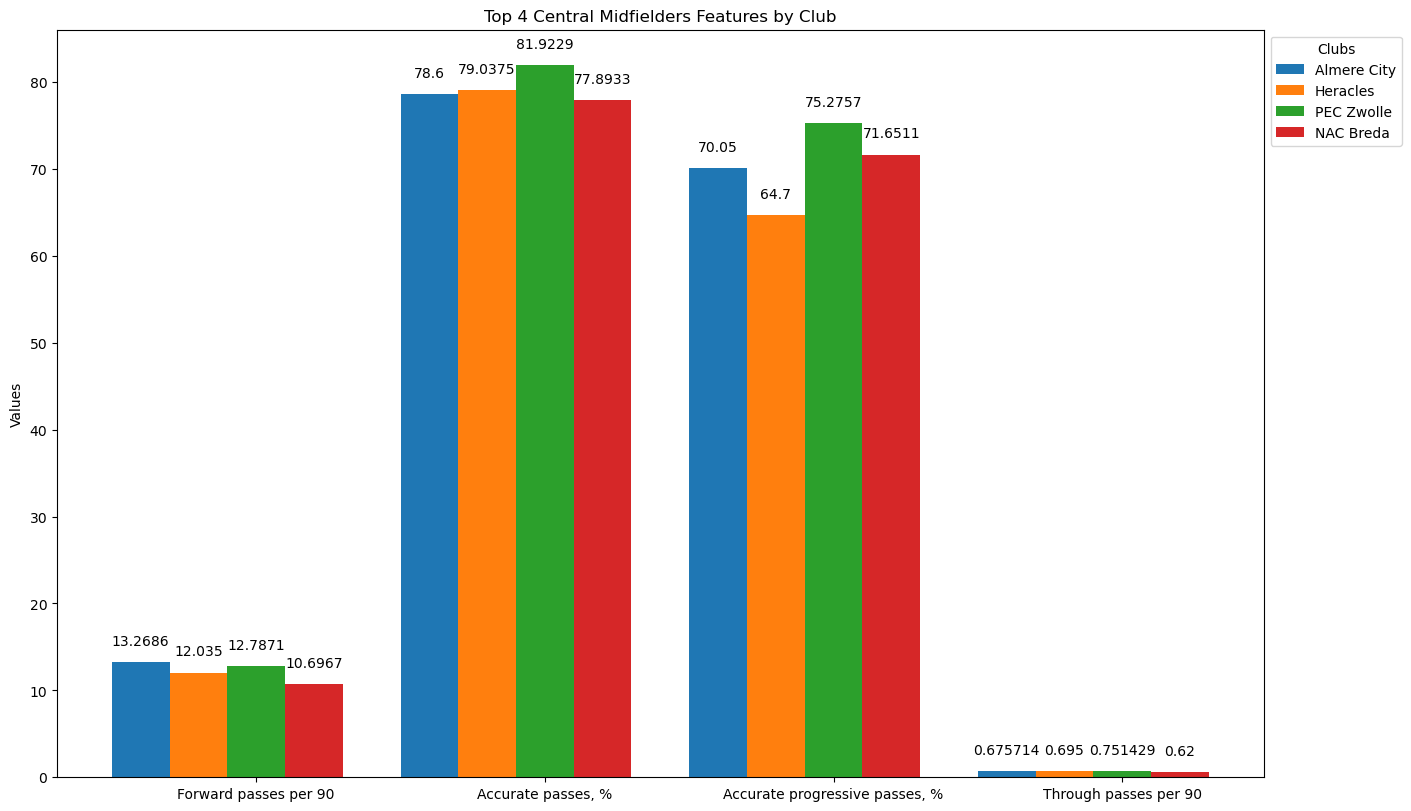

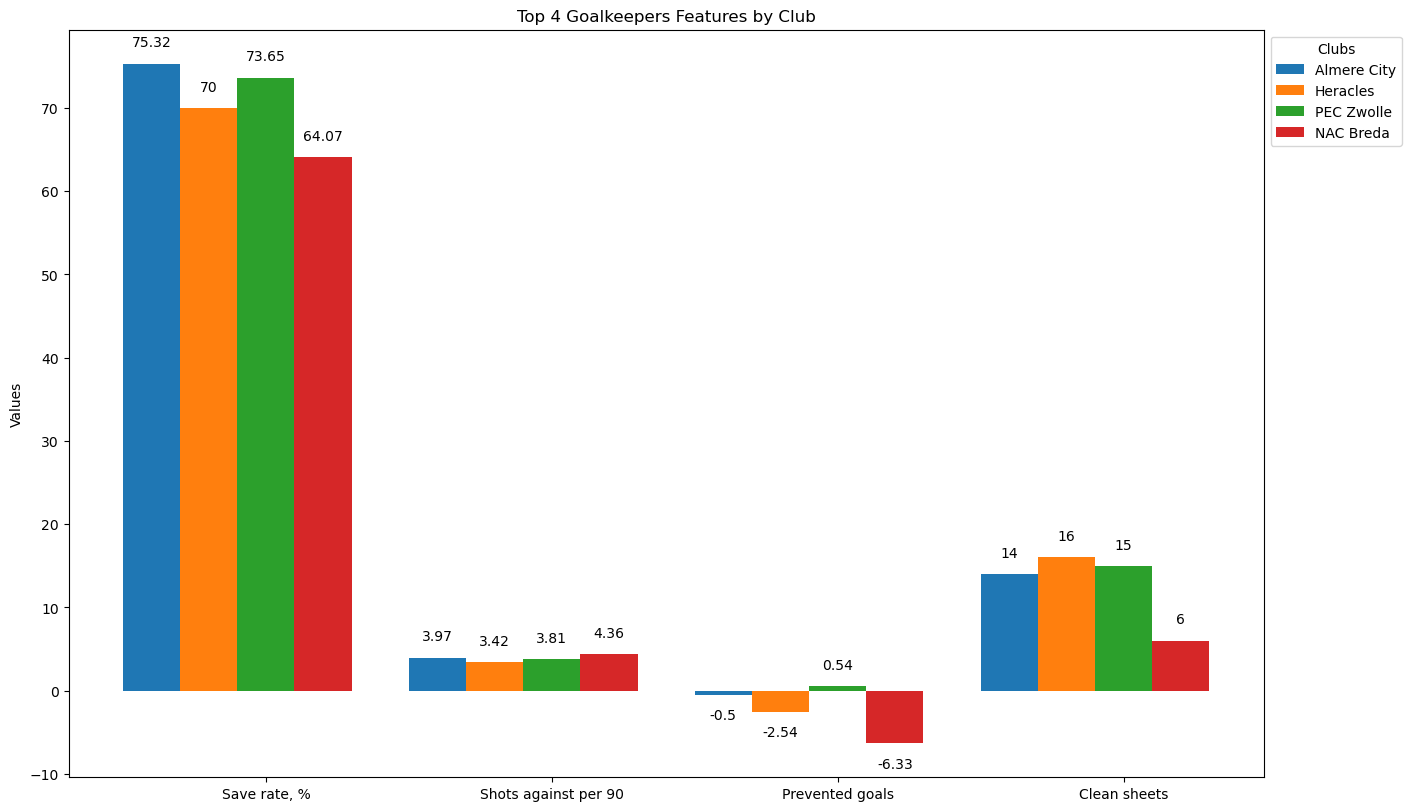

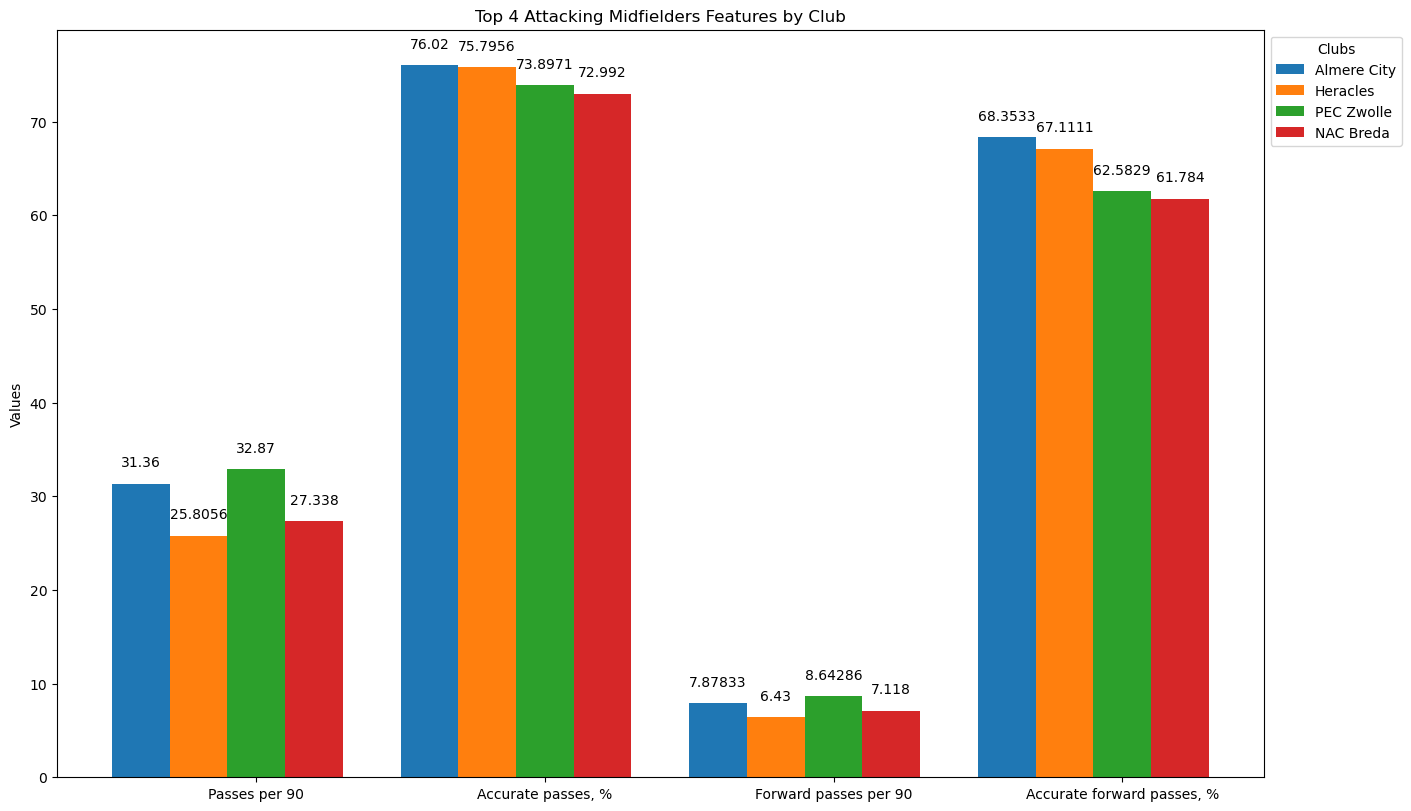

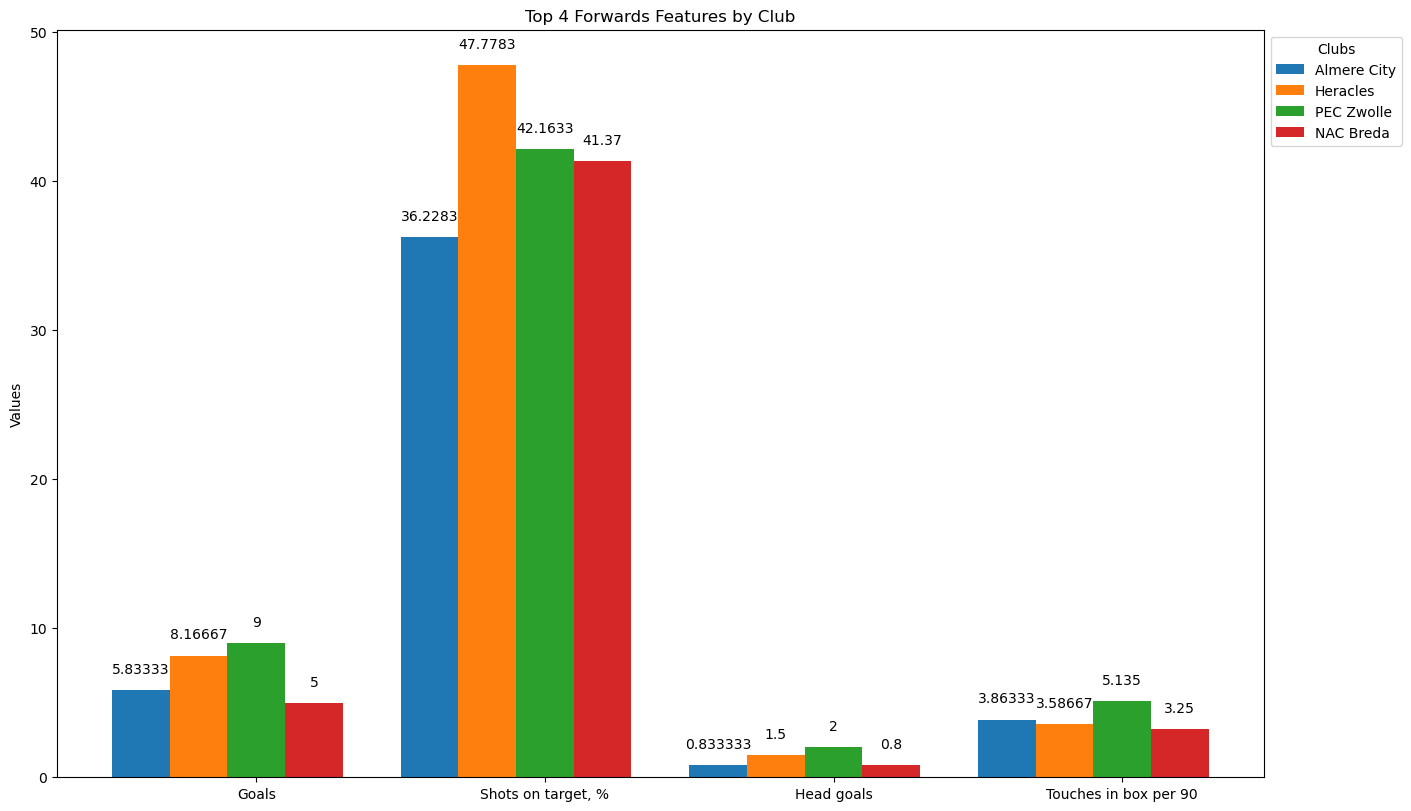

In [26]:
import matplotlib.pyplot as plt
import numpy as np

def create_position_visualization(position_data, position_name, top_features, figsize=(14, 8)):
    # Set up the figure and axes with the specified size
    fig, ax = plt.subplots(figsize=figsize, constrained_layout=True)

    # List of clubs
    clubs = position_data.keys()

    # Set the positions for each group of bars
    x = np.arange(len(clubs))
    width = 0.2  # the width of the bars

    # Iterate through each club and plot the top features for the position
    for i, club in enumerate(clubs):
        player_df = position_data[club]
        offset = width * i
        rects = ax.bar(x + offset, player_df[top_features].mean().values, width, label=club)
        ax.bar_label(rects, padding=10)

    # Add some text for labels, title, and custom x-axis tick labels
    ax.set_ylabel('Values')
    ax.set_title(f'Top {len(top_features)} {position_name} Features by Club')
    ax.set_xticks(x + (width * len(clubs) / 2))
    ax.set_xticklabels(top_features)
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Clubs')

    plt.show()

# Example usage for different positions
# Fill in the features for each position
features_becks = ["Accurate passes, %","Lateral passes per 90","Accurate forward passes, %","PAdj Sliding tackles"]
features_central = ["Fouls per 90","PAdj Sliding tackles",	"PAdj Interceptions",	"Defensive duels per 90"]
features_wingers = ["Crosses per 90", "Key passes per 90", "Assists per 90", "Successful dribbles, %"]
features_defensive_midfielders = ["Accurate passes, %", "Accurate passes to final third, %", "Yellow cards per 90", "PAdj Interceptions"]
features_Central_midfielders = ["Forward passes per 90", "Accurate passes, %", "Accurate progressive passes, %", "Through passes per 90"]
features_goalkeepers = ["Save rate, %", "Shots against per 90", "Prevented goals", "Clean sheets"]
features_attacking_midfielders = ["Passes per 90","Accurate passes, %", "Forward passes per 90", "Accurate forward passes, %"]
features_forwards = ["Goals", "Shots on target, %", "Head goals", "Touches in box per 90"]

# Fill in the corresponding datasets
becks_data = {"Almere City": becks_Almere_City, "Heracles": becks_Heracles, "PEC Zwolle": becks_Zwolle, "NAC Breda": becks_Breda}
central_data = {"Almere City": Central_Almere_City, "Heracles": Central_Heracles, "PEC Zwolle": Central_Zwolle, "NAC Breda": Central_Breda}
wingers_data = {"Almere City": wingers_Almere_City, "Heracles": wingers_Heracles, "PEC Zwolle": wingers_Zwolle, "NAC Breda": wingers_Breda}
defensive_midfielders_data = {"Almere City": defensive_midfieders_Almere_City, "Heracles": defensive_midfieders_Heracles, "PEC Zwolle": defensive_midfieders_Zwolle, "NAC Breda": defensive_midfieders_Breda}
Central_midfielders_data = {"Almere City": Central_midfielders_Almere_City, "Heracles": Central_midfielders_Heracles, "PEC Zwolle": Central_midfielders_Zwolle, "NAC Breda": Central_midfielders_Breda}
attacking_midfielders_data = {"Almere City": atacking_MF_Almere_City, "Heracles": atacking_MF_Heracles, "PEC Zwolle": atacking_MF_Zwolle, "NAC Breda": atacking_MF_Breda}
goalkeepers_data = {"Almere City": goalkepers_Almere_City, "Heracles": goalkepers_Heracles, "PEC Zwolle": goalkepers_Zwolle, "NAC Breda": goalkepers_Breda}
forwards_data = {"Almere City": forward_Almere_City, "Heracles": forward_Heracles, "PEC Zwolle": forward_Zwolle, "NAC Breda": forward_Breda}

# Create visualizations for each position
create_position_visualization(becks_data, "Becks", features_becks)
create_position_visualization(central_data, "Central Back", features_central)
create_position_visualization(wingers_data, "Wingers", features_wingers)
create_position_visualization(defensive_midfielders_data, "Defensive Midfielders", features_defensive_midfielders)
create_position_visualization(Central_midfielders_data, "Central Midfielders", features_Central_midfielders)
create_position_visualization(goalkeepers_data, "Goalkeepers", features_goalkeepers)
create_position_visualization(attacking_midfielders_data, "Attacking Midfielders", features_attacking_midfielders)
create_position_visualization(forwards_data, "Forwards", features_forwards)


#### All of the Teams different metrics 

In [27]:
# selecting all of the players from the teams 
Almere_city__all_players = df[df['Team within selected timeframe'] == "Almere City"]
Heracles__all_players = df[df['Team within selected timeframe'] == "Heracles"]
Pec_Zwolle_all_players = df[df['Team within selected timeframe'] == "PEC Zwolle"]
Breda__all_players = df[df['Team within selected timeframe'] == "NAC Breda"]

C:\Users\35988\AppData\Local\Temp\ipykernel_2540\3413838055.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_cycle = plt.cm.get_cmap('tab10', len(team_names))


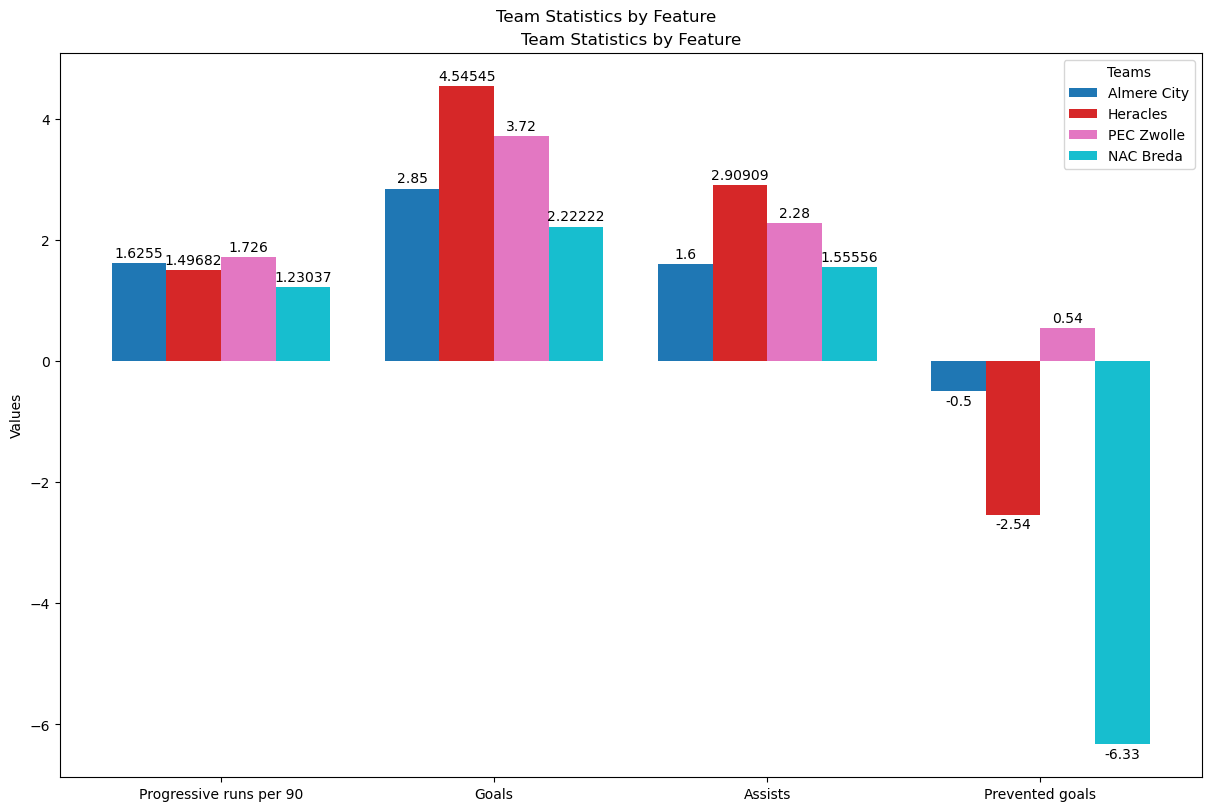

In [28]:
import matplotlib.pyplot as plt
import numpy as np

def create_team_visualization_all_teams(team_datasets, team_names, top_features, figsize=(12, 8)):
    # Set up the figure and axes with the specified size
    fig, ax = plt.subplots(figsize=figsize, constrained_layout=True)
    fig.suptitle('Team Statistics by Feature')

    # Set the positions for each group of bars
    x = np.arange(len(top_features))
    width = 0.2  # the width of the bars

    # Set up color cycle for teams
    color_cycle = plt.cm.get_cmap('tab10', len(team_names))

    # Iterate through each team and plot the team statistics for each feature
    for i, (team_data, team_name) in enumerate(zip(team_datasets, team_names)):
        offset = width * i
        color = color_cycle(i)
        rects = ax.bar(x + offset, [team_data[feature].mean() for feature in top_features], width, label=team_name, color=color)
        ax.bar_label(rects, padding=2)

    # Add some text for labels, title, and custom x-axis tick labels
    ax.set_ylabel('Values')
    ax.set_title('Team Statistics by Feature')
    ax.set_xticks(x + (width * (len(team_names) - 1) / 2))
    ax.set_xticklabels(top_features)

    # Place legend in the top right corner
    ax.legend(loc='upper right', title="Teams")

    plt.show()

# Example usage for all teams
# Fill in the features for all teams
features_all_teams = ["Progressive runs per 90", "Goals", "Assists", "Prevented goals"]

# Fill in the corresponding datasets for all teams
all_teams_datasets = [Almere_city__all_players, Heracles__all_players, Pec_Zwolle_all_players, Breda__all_players]
all_teams_names = ["Almere City", "Heracles", "PEC Zwolle", "NAC Breda"]

# Create visualization for all teams
create_team_visualization_all_teams(all_teams_datasets, all_teams_names, features_all_teams)


### Trying to make two algorithms to predict what players should NAC buy 

#### Linear regression

In [29]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Assuming df is your original DataFrame
# Filter rows where the "GK" column is equal to 1
goalkeepers_df = df[df["GK"] == 1]

# Check for missing values and handle them if needed

# Convert categorical variables into numerical format (if any)
# Example: goalkeepers_df['Foot'] = pd.Categorical(goalkeepers_df['Foot']).codes

# Define the list of features excluding 'Prevented goals'
goalkeeper_features = [
    'Save rate, %', 'Aerial duels per 90.1', 'Clean sheets', 'Prevented goals per 90',
    'Exits per 90', 'Passes per 90','Accurate short / medium passes, %',
    'Accurate long passes, %', 'Long passes per 90', 'Conceded goals per 90',
    'Age', 'Market value', 'Matches played', 'Minutes played',
    'Shots against per 90', 'xG against per 90', 'xG against'
]

# Filter out rows with missing contract expiration dates
goalkeepers_df = goalkeepers_df.dropna(subset=['Contract expires'])
goalkeepers_df['Contract expires'] = pd.to_datetime(goalkeepers_df['Contract expires'], format='%Y-%m-%d')

# Calculate contract duration
today = pd.to_datetime('today')
goalkeepers_df['Contract duration'] = (goalkeepers_df['Contract expires'] - today).dt.days

# Train a Linear Regression model
X_goalkeepers = goalkeepers_df[goalkeeper_features]
y_goalkeepers = goalkeepers_df['Prevented goals']  # Use 'Prevented goals' as the target variable

X_train_goalkeepers, X_test_goalkeepers, y_train_goalkeepers, y_test_goalkeepers = train_test_split(
    X_goalkeepers, y_goalkeepers, test_size=0.2, random_state=42
)

model_goalkeepers = LinearRegression()
model_goalkeepers.fit(X_train_goalkeepers, y_train_goalkeepers)

# Evaluate the model
y_pred_goalkeepers = model_goalkeepers.predict(X_test_goalkeepers)
mae = mean_absolute_error(y_test_goalkeepers, y_pred_goalkeepers)
r2 = r2_score(y_test_goalkeepers, y_pred_goalkeepers)

print("Mean Absolute Error:", mae)
print("R-squared:", r2)

# Feature Importance Analysis
feature_importance_goalkeepers = pd.DataFrame({'Feature': goalkeeper_features, 'Importance': model_goalkeepers.coef_})
feature_importance_goalkeepers = feature_importance_goalkeepers.sort_values(by='Importance', ascending=False)
print("\nGoalkeeper Feature Importance:")
print(feature_importance_goalkeepers)

# Recommendation
# Remove team-specific filtering for goalkeepers_df
target_team_goalkeepers_df = goalkeepers_df.copy()

# Predict prevented goals using the trained model
target_team_goalkeepers_df['Predicted Prevented goals'] = model_goalkeepers.predict(target_team_goalkeepers_df[goalkeeper_features])

# Define threshold for predicted prevented goals
predicted_prevented_goals_threshold = 3.0

# Select goalkeepers based on predictions and other criteria
goalkeepers_to_buy = target_team_goalkeepers_df[
    (target_team_goalkeepers_df['Predicted Prevented goals'] >= predicted_prevented_goals_threshold) &
    (target_team_goalkeepers_df['Contract duration'] <= 0) &
    (target_team_goalkeepers_df['Matches played'] > 10)  # Players who have played more than 10 matches
]

# Sort goalkeepers by predicted prevented goals in descending order
goalkeepers_to_buy = goalkeepers_to_buy.sort_values(by='Clean sheets', ascending=False)

# Display the recommended goalkeepers with specific columns
print("\nRecommended Goalkeepers:")
goalkeepers_to_buy[['Player',"Team within selected timeframe",'Age', 'Market value', 'Contract expires', 'Matches played', 'Minutes played',"Clean sheets","Prevented goals","Save rate, %", 'Predicted Prevented goals']]


Mean Absolute Error: 1.5437553442716256
R-squared: 0.6768064864936028

Goalkeeper Feature Importance:
                              Feature    Importance
15                  xG against per 90  1.306205e+01
14               Shots against per 90  8.072587e-01
2                        Clean sheets  6.245839e-01
1               Aerial duels per 90.1  3.240126e-01
16                         xG against  1.759511e-01
4                        Exits per 90  1.579609e-01
7             Accurate long passes, %  1.167710e-02
10                                Age  4.333083e-03
5                       Passes per 90  3.262086e-03
11                       Market value  8.476223e-08
13                     Minutes played -3.263590e-03
6   Accurate short / medium passes, % -3.599132e-02
0                        Save rate, % -9.036792e-02
8                  Long passes per 90 -9.409972e-02
12                     Matches played -9.926534e-02
3              Prevented goals per 90 -3.448295e+00
9             

,Player,Team within selected timeframe,Age,Market value,Contract expires,Matches played,Minutes played,Clean sheets,Prevented goals,"Save rate, %",Predicted Prevented goals
11943,V. Černiauskas,Panevėžys,34.0,200000,2023-12-31,28,2705,21,7.04,86.30,7.719118
11894,L. Paukste,Šiauliai,24.0,300000,2023-12-31,22,2114,12,3.79,75.95,4.661955
16378,A. Fagerström,Västerås SK,31.0,175000,2023-12-31,21,2082,12,3.38,78.67,4.299383
7883,Á. Ólafsson,Stjarnan,32.0,50000,2023-11-16,25,2418,9,5.76,75.00,3.724005
12141,L. Wahlstedt,Odds,24.0,1400000,2023-12-31,17,1658,8,3.06,75.00,4.451844
16327,R. Wallinder,Gefle,24.0,225000,2023-12-31,20,1984,5,9.92,79.31,6.373220
1068,S. Lammens,Club Brugge II,20.0,600000,2023-06-30,11,1050,3,4.72,79.10,5.387587


In [30]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Assuming df is your original DataFrame
# Filter rows where the "GK" column is equal to 1
goalkeepers_df = df[df["GK"] == 1]



# Define the list of features excluding 'Prevented goals'
goalkeeper_features = [
    'Save rate, %', 'Aerial duels per 90.1', 'Clean sheets', 'Prevented goals per 90',
    'Accurate short / medium passes, %', 'Exits per 90', 'Passes per 90',
    'Accurate long passes, %', 'Long passes per 90', 'Conceded goals per 90',
    'Age', 'Market value', 'Matches played', 'Minutes played',
    'Shots against per 90', 'xG against per 90', 'xG against'
]

# Filter out rows with missing contract expiration dates
goalkeepers_df = goalkeepers_df.dropna(subset=['Contract expires'])
goalkeepers_df['Contract expires'] = pd.to_datetime(goalkeepers_df['Contract expires'], format='%Y-%m-%d')

# Calculate contract duration
today = pd.to_datetime('today')
goalkeepers_df['Contract duration'] = (goalkeepers_df['Contract expires'] - today).dt.days

# Train a Random Forest Regressor model
X_goalkeepers = goalkeepers_df[goalkeeper_features]
y_goalkeepers = goalkeepers_df['Prevented goals']  # Use 'Prevented goals' as the target variable

X_train_goalkeepers, X_test_goalkeepers, y_train_goalkeepers, y_test_goalkeepers = train_test_split(
    X_goalkeepers, y_goalkeepers, test_size=0.2, random_state=42
)

model_rf_goalkeepers = RandomForestRegressor(random_state=42)
model_rf_goalkeepers.fit(X_train_goalkeepers, y_train_goalkeepers)

# Evaluate performance on the test set
y_pred_rf_goalkeepers = model_rf_goalkeepers.predict(X_test_goalkeepers)
mae_rf_goalkeepers = mean_absolute_error(y_test_goalkeepers, y_pred_rf_goalkeepers)
r2_rf_goalkeepers = r2_score(y_test_goalkeepers, y_pred_rf_goalkeepers)

print("Random Forest Mean Absolute Error:", mae_rf_goalkeepers)
print("Random Forest R-squared:", r2_rf_goalkeepers)

# Feature Importance Analysis
feature_importance_rf_goalkeepers = pd.DataFrame({'Feature': goalkeeper_features, 'Importance': model_rf_goalkeepers.feature_importances_})
feature_importance_rf_goalkeepers = feature_importance_rf_goalkeepers.sort_values(by='Importance', ascending=False)
print("\nRandom Forest Goalkeeper Feature Importance:")
print(feature_importance_rf_goalkeepers)

# Recommendation
# Remove team-specific filtering for goalkeepers_df
target_team_goalkeepers_df = goalkeepers_df.copy()

# Predict prevented goals using the trained Random Forest model
target_team_goalkeepers_df['Predicted Prevented goals RF'] = model_rf_goalkeepers.predict(target_team_goalkeepers_df[goalkeeper_features])

# Define threshold for predicted prevented goals
predicted_prevented_goals_threshold_rf = 3.0

# Select goalkeepers based on predictions and other criteria using Random Forest
goalkeepers_to_buy_rf = target_team_goalkeepers_df[
    (target_team_goalkeepers_df['Predicted Prevented goals RF'] >= predicted_prevented_goals_threshold_rf) &
    (target_team_goalkeepers_df['Contract duration'] <= 0) &
    (target_team_goalkeepers_df['Matches played'] > 10)  # Players who have played more than 10 matches
]

# Sort goalkeepers by predicted prevented goals in descending order
goalkeepers_to_buy_rf = goalkeepers_to_buy_rf.sort_values(by='Predicted Prevented goals RF', ascending=False)

# Display the recommended goalkeepers with specific columns
print("\nRecommended Goalkeepers with Random Forest:")
goalkeepers_to_buy_rf[['Player', 'Age', 'Market value', 'Contract expires', 'Matches played', 'Minutes played', 'Predicted Prevented goals RF']]


Random Forest Mean Absolute Error: 0.28758707482993184
Random Forest R-squared: 0.9832359436310087

Random Forest Goalkeeper Feature Importance:
                              Feature  Importance
3              Prevented goals per 90    0.835517
13                     Minutes played    0.068761
12                     Matches played    0.044775
16                         xG against    0.030445
2                        Clean sheets    0.003387
0                        Save rate, %    0.002106
7             Accurate long passes, %    0.001886
6                       Passes per 90    0.001782
1               Aerial duels per 90.1    0.001483
8                  Long passes per 90    0.001378
4   Accurate short / medium passes, %    0.001375
5                        Exits per 90    0.001242
11                       Market value    0.001235
10                                Age    0.001230
9               Conceded goals per 90    0.001176
15                  xG against per 90    0.001163
14   

,Player,Age,Market value,Contract expires,Matches played,Minutes played,Predicted Prevented goals RF
16327,R. Wallinder,24.0,225000,2023-12-31,20,1984,8.7757
4182,O. Forsman,35.0,50000,2023-12-31,26,2499,7.6878
11943,V. Černiauskas,34.0,200000,2023-12-31,28,2705,6.3689
7883,Á. Ólafsson,32.0,50000,2023-11-16,25,2418,5.8017
1068,S. Lammens,20.0,600000,2023-06-30,11,1050,4.1232
11894,L. Paukste,24.0,300000,2023-12-31,22,2114,4.0039
16378,A. Fagerström,31.0,175000,2023-12-31,21,2082,3.5209
12141,L. Wahlstedt,24.0,1400000,2023-12-31,17,1658,3.2223
8098,D. Lyness,32.0,150000,2023-11-30,27,2647,3.0134


In [31]:
from sklearn.metrics import accuracy_score

# Convert the regression problem into a binary classification problem
# Assume a threshold for prevented goals to determine positive/negative class
threshold = 3.0
y_pred_binary = (y_pred_rf_goalkeepers >= threshold).astype(int)
y_test_binary = (y_test_goalkeepers >= threshold).astype(int)

# Calculate and print the accuracy score
accuracy_rf_goalkeepers = accuracy_score(y_test_binary, y_pred_binary)
print("Accuracy of the Random Forest Model (Binary Classification):", accuracy_rf_goalkeepers)

Accuracy of the Random Forest Model (Binary Classification): 1.0


In [32]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model_rf_goalkeepers, X_goalkeepers, y_goalkeepers, cv=5, scoring='neg_mean_absolute_error')

# Display cross-validation scores
print("Cross-Validation Mean Absolute Error:", -cv_scores.mean())


Cross-Validation Mean Absolute Error: 0.3579136278072872


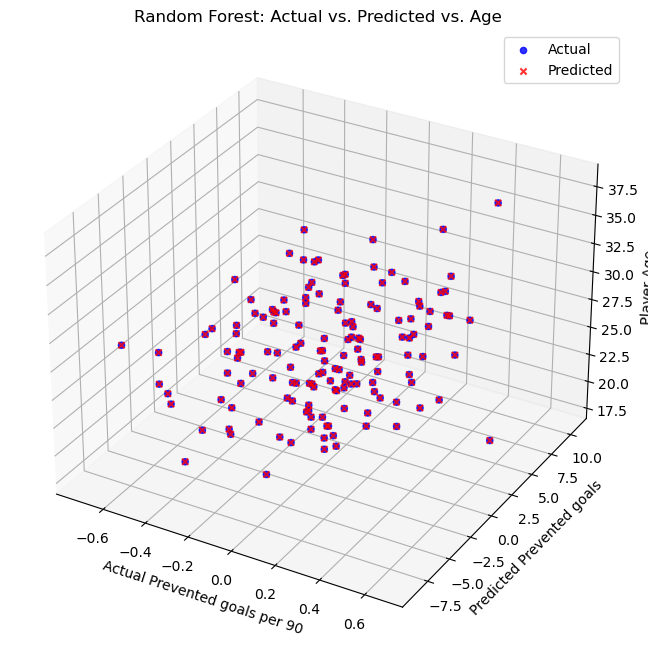

In [33]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Predictions on the test set
y_pred_test_rf_goalkeepers = model_rf_goalkeepers.predict(X_test_goalkeepers)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for actual values (in blue)
scatter_actual = ax.scatter(
    X_test_goalkeepers['Prevented goals per 90'],  # x-axis: Actual Prevented goals per 90
    y_pred_test_rf_goalkeepers,                    # y-axis: Predicted Prevented goals
    X_test_goalkeepers['Age'],                     # z-axis: Player Age
    c='blue',                                      # color for actual values
    marker='o',                                    # marker style for actual values
    alpha=0.8,
    label='Actual'
)

# Scatter plot for predicted values (in red)
scatter_predicted = ax.scatter(
    X_test_goalkeepers['Prevented goals per 90'],  # x-axis: Actual Prevented goals per 90
    y_pred_test_rf_goalkeepers,                    # y-axis: Predicted Prevented goals
    X_test_goalkeepers['Age'],                     # z-axis: Player Age
    c='red',                                       # color for predicted values
    marker='x',                                    # marker style for predicted values
    alpha=0.8,
    label='Predicted'
)

# Add labels and title
ax.set_xlabel('Actual Prevented goals per 90')
ax.set_ylabel('Predicted Prevented goals')
ax.set_zlabel('Player Age')
ax.set_title('Random Forest: Actual vs. Predicted vs. Age')

# Add legend
ax.legend()

plt.show()


#### Gradient Boosting Trees 

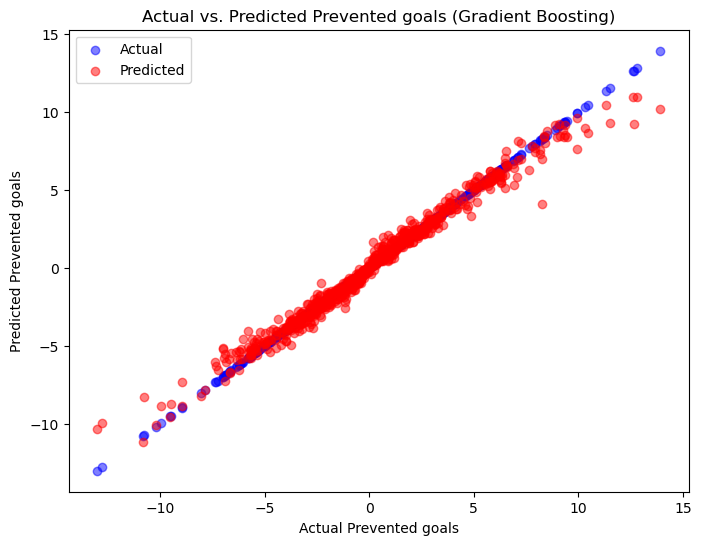

In [34]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt

# Create a Gradient Boosting Regressor
model_gb_goalkeepers = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Perform cross-validation
y_cv_pred_gb = cross_val_predict(model_gb_goalkeepers, X_goalkeepers, y_goalkeepers, cv=5)

# Create a scatter plot for cross-validated predictions using Gradient Boosting
plt.figure(figsize=(8, 6))

# Scatter plot for actual values (in blue)
plt.scatter(
    y_goalkeepers,
    y_goalkeepers,
    color='blue',
    alpha=0.5,
    label='Actual'
)

# Scatter plot for predicted values (in red)
plt.scatter(
    y_goalkeepers,
    y_cv_pred_gb,
    color='red',
    alpha=0.5,
    label='Predicted'
)

plt.title('Actual vs. Predicted Prevented goals (Gradient Boosting)')
plt.xlabel('Actual Prevented goals')
plt.ylabel('Predicted Prevented goals')
plt.legend()
plt.show()


✍️ I choose the features above because they are the most compatable for goalkeepers and predicting prevented goals 

### Evaluating the performance of the model

In the following subsection include your Python code on how you evaluated your chosen model(s). This is related to the sufficient criteria of ILO 5.0. 

In [35]:
from sklearn.metrics import mean_absolute_error, r2_score

# Fit the model on the entire dataset
model_gb_goalkeepers.fit(X_goalkeepers, y_goalkeepers)

# Predict on the entire dataset
y_pred_gb = model_gb_goalkeepers.predict(X_goalkeepers)

# Compute Mean Absolute Error
mae_gb = mean_absolute_error(y_goalkeepers, y_pred_gb)

# Compute R-squared
r2_gb = r2_score(y_goalkeepers, y_pred_gb)

print(f"Mean Absolute Error (Gradient Boosting): {mae_gb}")
print(f"R-squared (Gradient Boosting): {r2_gb}")


Mean Absolute Error (Gradient Boosting): 0.1800841312857759
R-squared (Gradient Boosting): 0.9964585460698362


### Improving the performance of the model

In the following subsection include your Python code on how you improved your chosen model(s). This is related to the good criteria of ILO 5.0.  

✍️ Interpretation of the model evaluation: In summary, the chosen hyperparameters, including a moderate learning rate, limited tree depth, and enough estimators, contribute to the model's effective performance, as evidenced by the low cross-validation MAE. These hyperparameters strike a balance between model complexity and the ability to generalize well to new data. 

In [37]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting Hyperparameter Tuning
param_grid_gb = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_gb = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid_gb, scoring='neg_mean_absolute_error', cv=5)
grid_gb.fit(X_goalkeepers, y_goalkeepers)

# Best hyperparameters for Gradient Boosting
best_params_gb = grid_gb.best_params_

# Cross-Validation Mean Absolute Error for Gradient Boosting
cv_scores_gb = -cross_val_score(grid_gb.best_estimator_, X_goalkeepers, y_goalkeepers, cv=5, scoring='neg_mean_absolute_error').mean()

print("Gradient Boosting Best Hyperparameters:", best_params_gb)
print("Gradient Boosting Cross-Validation Mean Absolute Error:", cv_scores_gb)



Gradient Boosting Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}
Gradient Boosting Cross-Validation Mean Absolute Error: 0.27204819349905934


In [40]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Define the best hyperparameters
best_params_gb = {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}

# Instantiate the Gradient Boosting model with the best hyperparameters
best_model_gb = GradientBoostingRegressor(**best_params_gb, random_state=42)

# Fit the model on the entire dataset using the best hyperparameters
best_model_gb.fit(X_goalkeepers, y_goalkeepers)

# Predict on the entire dataset using the best model
y_pred_gb = best_model_gb.predict(X_goalkeepers)

# Compute Mean Absolute Error
mae_gb = mean_absolute_error(y_goalkeepers, y_pred_gb)

# Compute R-squared
r2_gb = r2_score(y_goalkeepers, y_pred_gb)

print(f"Mean Absolute Error (Gradient Boosting): {mae_gb}")
print(f"R-squared (Gradient Boosting): {r2_gb}")


Mean Absolute Error (Gradient Boosting): 0.023211287164399252
R-squared (Gradient Boosting): 0.9999436635603282


### Database and ETL

Include all the python code and explanations on your RESTful API and database operations in this section. This is related to the excellent criteria of ILO 4.1.

❗ These code you cannot showcast using the NAC data. Use the data provided for the homework and datalab preperation of these modules.

In [ ]:
# Include your code here for for the API and ETL. This is not done on the NAC data.

## Machine Learning

### Identifying basic Machine Learning applications.
In the following subsection, show your understanding of each of the listed Machine Learning algorithms. Excecute these algorithms on the NAC dataset. This is related to the poor (and insufficient) criteria of ILO 5.0. 

❗Remember! All your package imports should be on top of this notebook.

#### Simple machine learning modelling pipeline

In [ ]:
# Enter your code here for a simple machine learning modelling pipeline 

C:\Users\35988\AppData\Local\Temp\ipykernel_10460\388323580.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["Position_encoded", "Position_category"], inplace=True)


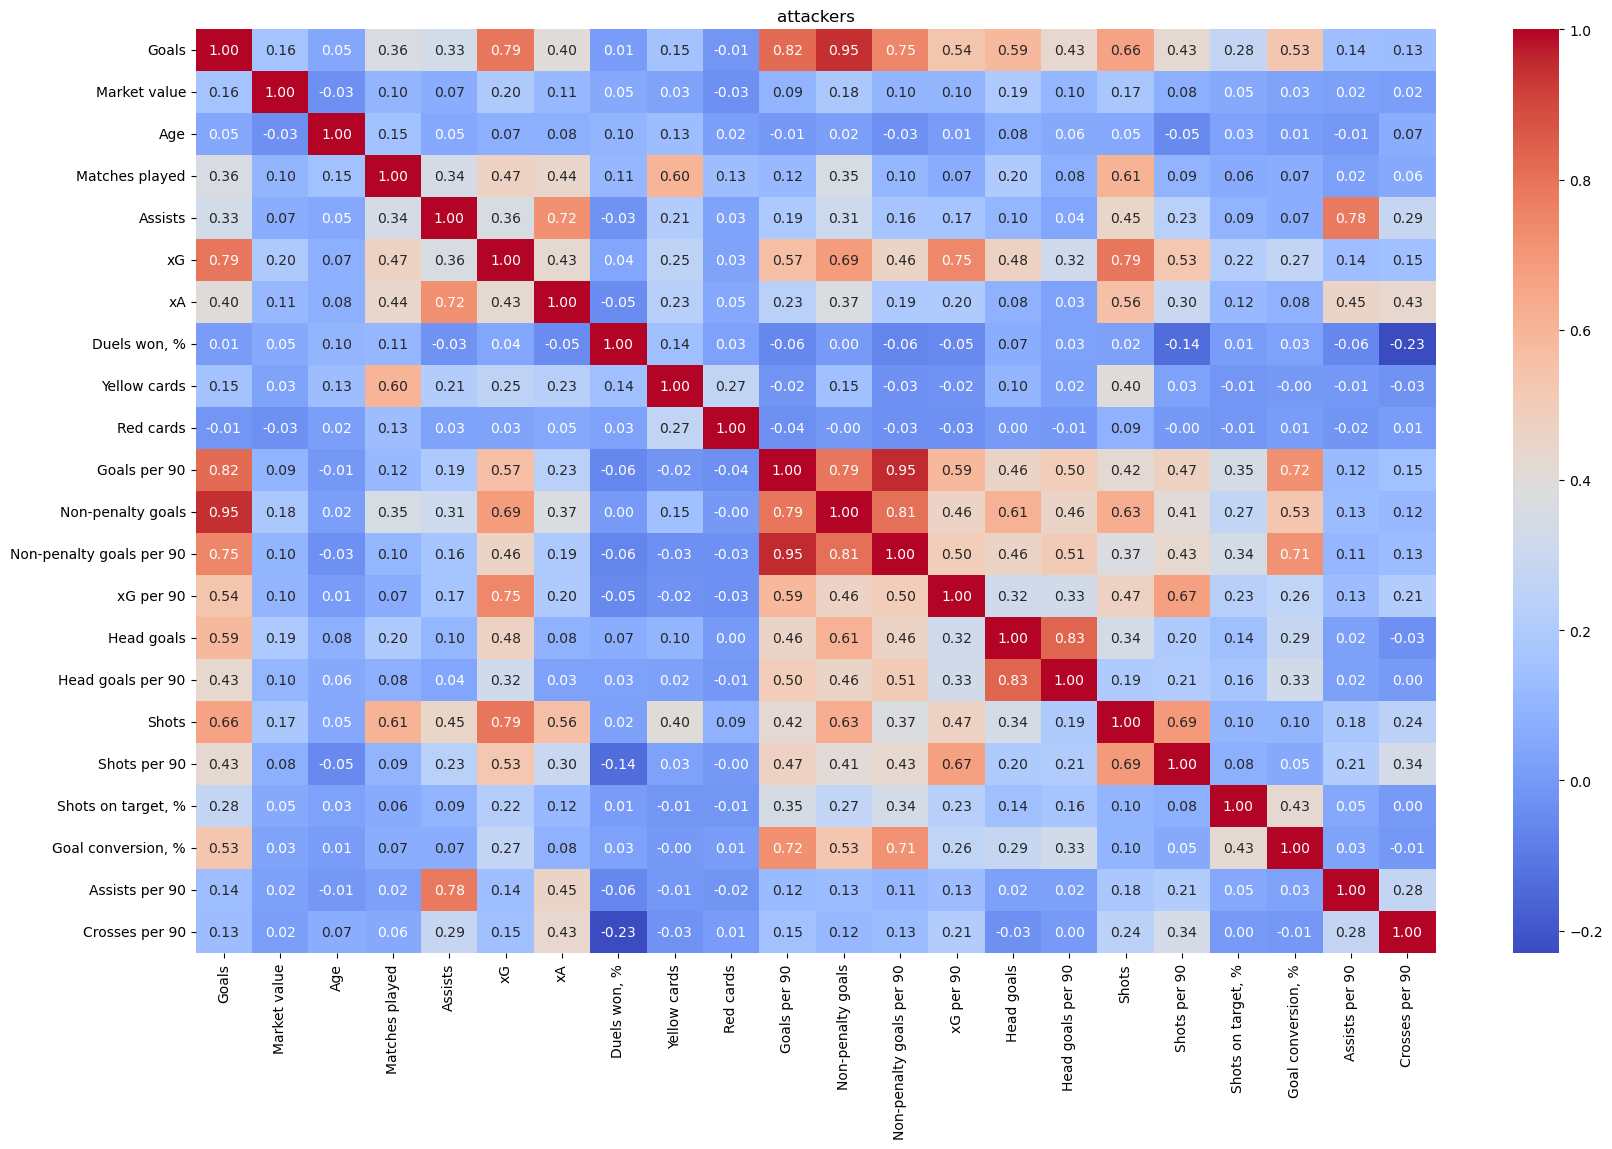

C:\Users\35988\AppData\Local\Temp\ipykernel_10460\388323580.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["Position_encoded", "Position_category"], inplace=True)


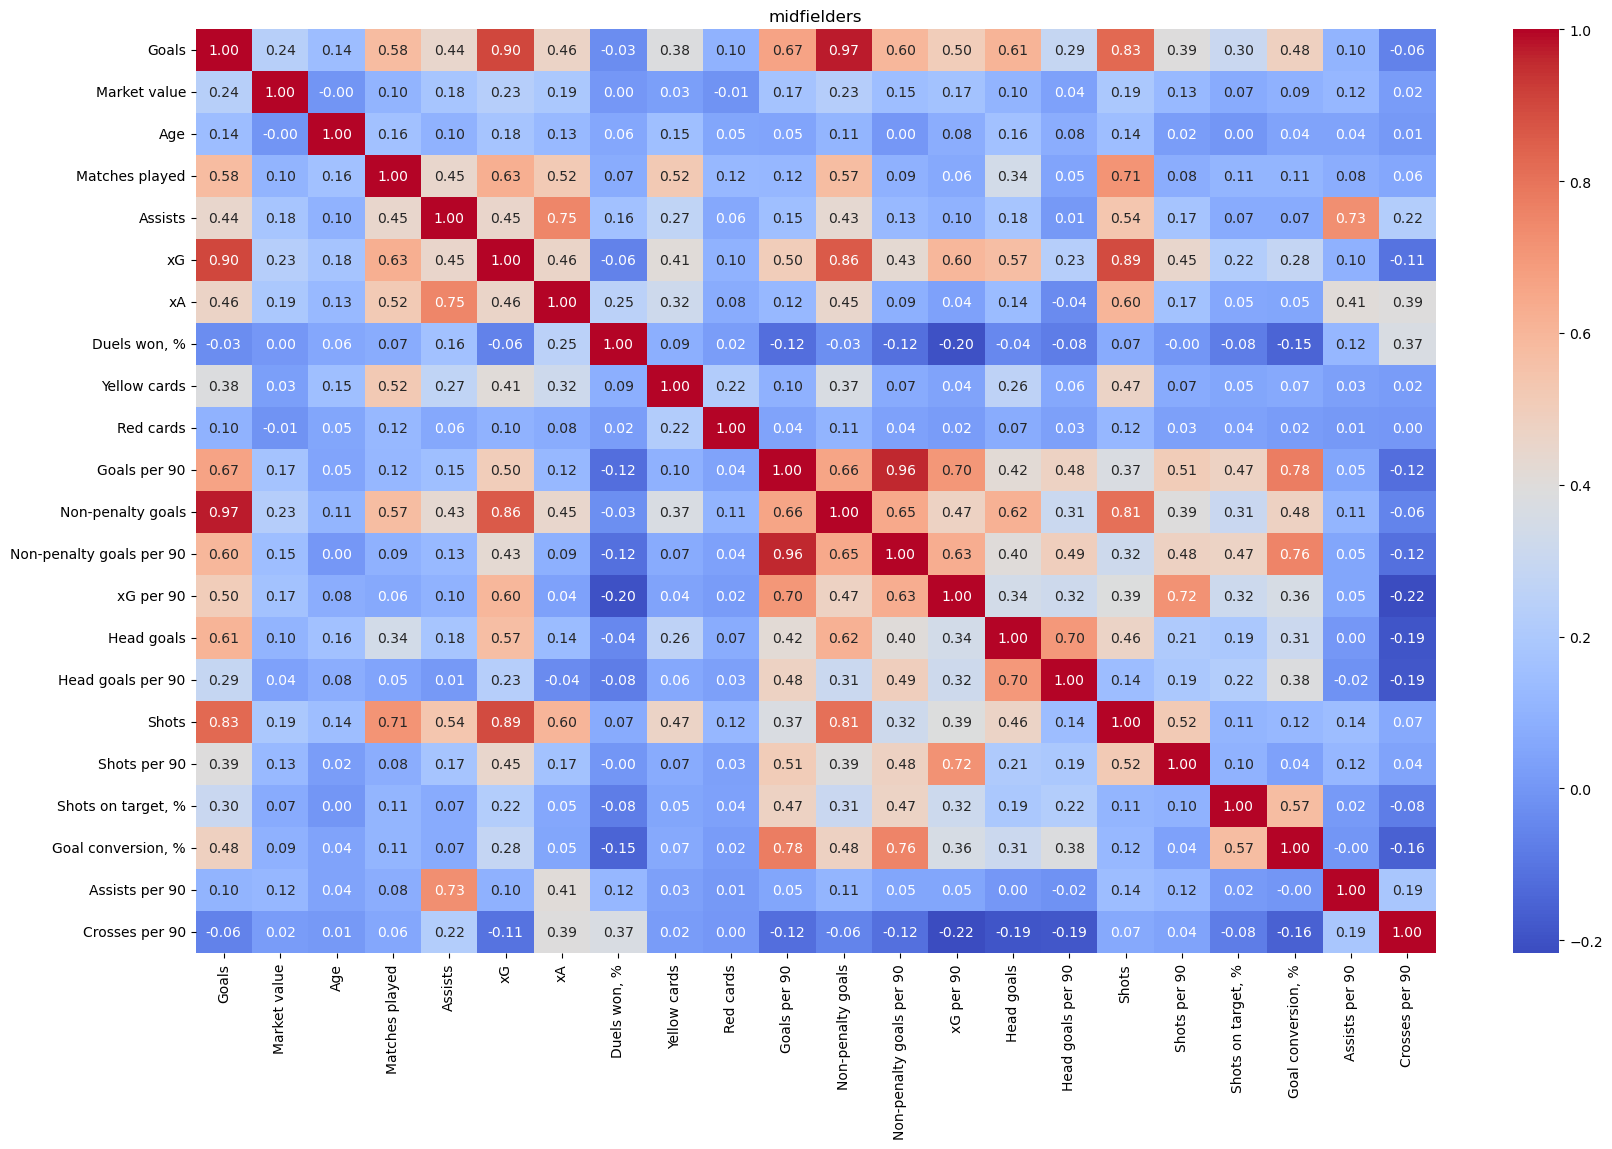

C:\Users\35988\AppData\Local\Temp\ipykernel_10460\388323580.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["Position_encoded", "Position_category"], inplace=True)


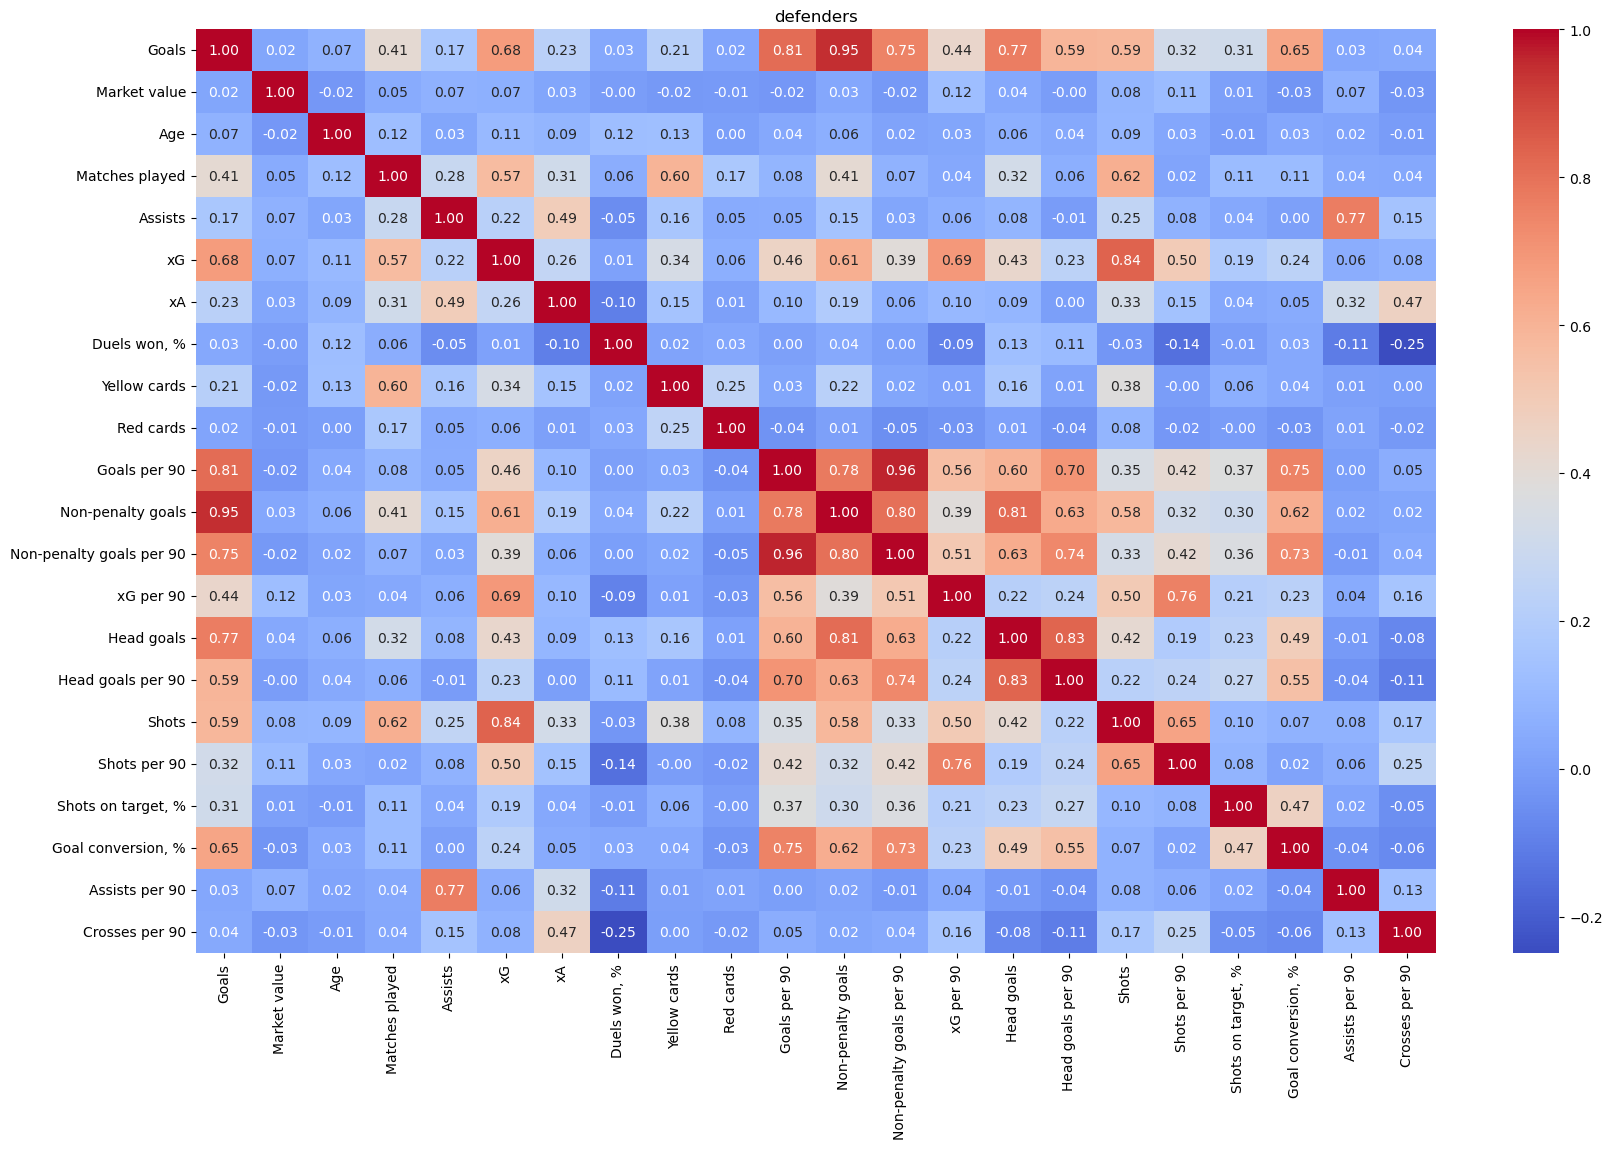

C:\Users\35988\AppData\Local\Temp\ipykernel_10460\388323580.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["Position_encoded", "Position_category"], inplace=True)


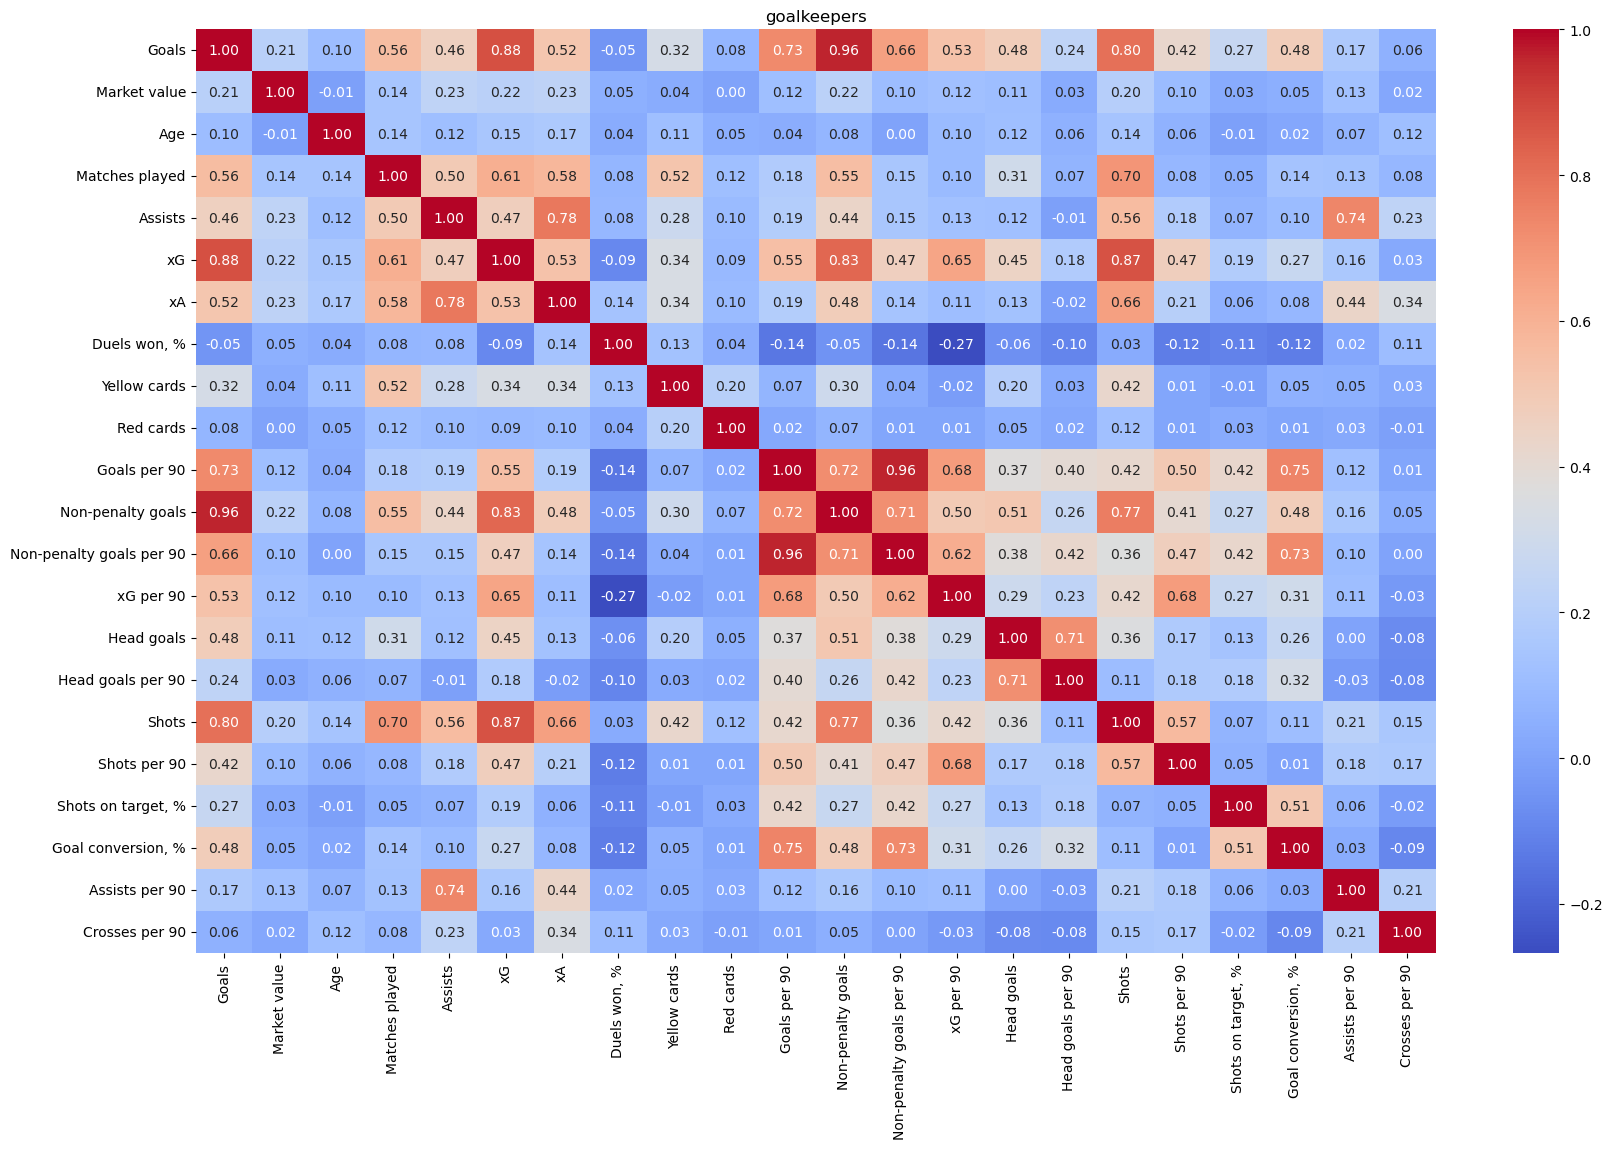

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming 'fb' is your original dataframe

# Copy relevant columns
fb_copy = fb[["Position", "Goals", "Market value", "Age", "Matches played", "Assists", "xG", "xA", "Duels won, %", "Yellow cards", "Red cards", "Goals per 90",
"Non-penalty goals",
"Non-penalty goals per 90",
"xG per 90",
"Head goals",
"Head goals per 90",
"Shots",
"Shots per 90",
"Shots on target, %",
"Goal conversion, %",
"Assists per 90",
"Crosses per 90"]].copy()
# feture 
features_iteration1 = ["Goals", "Assists", "xA", "Matches played", "Age", "Shots on target, %", "Goal conversion, %", "Shots per 90"]


# Split the positions into lists
fb_copy["Position"] = fb_copy["Position"].str.split(', ')

# Explode the lists into separate rows
fb_copy_explode = fb_copy.explode("Position")
b_copy_explode = fb_copy_explode.dropna(subset=features_iteration1 + ["Market value"])

# Use LabelEncoder to encode positions
le = LabelEncoder()
fb_copy_explode["Position_encoded"] = le.fit_transform(fb_copy_explode["Position"])

# Define position categories
position_mapping = {
    0: 'GK',    # Goalkeepers
    1: 'B',     # Defenders
    2: 'M',     # Midfielders
    3: 'F'      # Attackers
}

# Map the encoded values to the position categories
fb_copy_explode["Position_category"] = fb_copy_explode["Position_encoded"].map(position_mapping)

# Separate the data based on positions
goalkeepers = fb_copy_explode[fb_copy_explode['Position_category'] == 'GK']
defenders = fb_copy_explode[fb_copy_explode['Position_category'] == 'B']
midfielders = fb_copy_explode[fb_copy_explode['Position_category'] == 'M']
attackers = fb_copy_explode[fb_copy_explode['Position_category'] == 'F']
data_frame_list =[attackers, midfielders, defenders, goalkeepers]
data_frame_list_2 =["attackers", "midfielders", "defenders", "goalkeepers"]
# Now, 'Position_encoded' contains the numerical representation you desire,
# and 'Position_category' contains the original position category.
for df, name in zip(data_frame_list, data_frame_list_2):

    # Drop the temporary columns used for encoding and mapping
    df.drop(columns=["Position_encoded", "Position_category"], inplace=True)

    # Select only numeric columns for correlation matrix calculation
    numeric_columns = df.select_dtypes(include='number').columns
    correlation_matrix = df[numeric_columns].corr()

    # Display correlation values with the target variable "Market value"
    correlation_with_market_value = correlation_matrix["Market value"].sort_values(ascending=False)
    correlation_with_market_value
    import seaborn as sns

    # Assuming correlation_matrix is a Pandas DataFrame with correlation values
    plt.figure(figsize=(20, 12))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(name)
    plt.show()

#### Logistic regression

#### Tree-based model

In [ ]:
# Enter your code here for tree-based decision model

#### Gradient Boosting Trees 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_iris
import pandas as pd

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Convert to DataFrame for better readability
iris_df = pd.DataFrame(X, columns=iris.feature_names)
print(iris_df.head())
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 4, 6, None],
    'min_samples_split': [2, 4, 6]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X, y)

# Best parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best score found: ", grid_search.best_score_)

from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the parameter distribution
param_dist = {
    'n_estimators': np.arange(50, 200),
    'max_depth': [2, 4, 6, None],
    'min_samples_split': np.arange(2, 7)
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, random_state=42)

# Fit RandomizedSearchCV
random_search.fit(X, y)

# Best parameters and score
print("Best parameters found: ", random_search.best_params_)
print("Best score found: ", random_search.best_score_)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
Best parameters found:  {'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 50}
Best score found:  0.9666666666666668
Best parameters found:  {'n_estimators': 51, 'min_samples_split': 4, 'max_depth': 6}
Best score found:  0.9666666666666668


In [ ]:
# Enter your code here for SVM

#### Unsupervised learning with K-Means

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# redaing the dataset 
fb = pd.read_csv("football_data.csv")
fb = fb[~fb["Position"].isna()]
fb = fb[~fb["Age"].isna()]
fb = fb[~fb["Duels per 90"].isna()]
fb_positions = fb['Position'].str.get_dummies(', ')
df = pd.concat([fb, fb_positions], axis=1)

central_midfielders_positions = df[(df["RCMF"]== 1) | (df['LCMF']== 1 )]
central_midfielders_df = central_midfielders_positions[['Player', 'Team within selected timeframe', 'Age', 'Market value', 'Contract expires',
'Matches played', 'Minutes played', 'Goals', 'xG', 'Assists',"xA",'xA per 90', 'Shots',"Goals per 90",
'Shots per 90',"Non-penalty goals","Successful attacking actions per 90",'Forward passes per 90', 'Accurate passes, %',
"Non-penalty goals per 90",
'Shots on target, %', 'Goal conversion, %', 'Assists per 90', "Back passes per 90",
"Accurate back passes, %", "Short / medium passes per 90",
"Accurate short / medium passes, %",
"Long passes per 90",
"Accurate long passes, %",
"Average pass length, m",
"Average long pass length, m",
"Second assists per 90",
"Third assists per 90",
"Smart passes per 90",
"Accurate smart passes, %",
"Key passes per 90",
"Passes to final third per 90",
"Accurate passes to final third, %",
"Passes to penalty area per 90",
"Accurate passes to penalty area, %",
"Through passes per 90",
"Accurate through passes, %",
"Progressive passes per 90",
"Accurate progressive passes, %","Progressive runs per 90"]]
# Assuming 'central_midfielders_df' is your DataFrame containing central midfielder player data
X_central_midfielders = central_midfielders_df.drop(['Player', 'Team within selected timeframe', 'Contract expires'], axis=1)

# Standardize the features (important for K-Means)
scaler = StandardScaler()
X_central_midfielders_scaled = scaler.fit_transform(X_central_midfielders)

# Initialize the K-Means clustering algorithm
kmeans_central_midfielders = KMeans(n_clusters=3)  # Adjust the number of clusters as needed

# Fit the model
kmeans_central_midfielders.fit(X_central_midfielders_scaled)

# Access the labels assigned by K-Means
central_midfielders_labels = kmeans_central_midfielders.labels_

# Evaluate the clustering using silhouette score
silhouette_avg_central_midfielders = silhouette_score(X_central_midfielders_scaled, central_midfielders_labels)
print("Silhouette Score for K-Means (Central Midfielders):", silhouette_avg_central_midfielders)


c:\Users\35988\anaconda3\envs\Block_B\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for K-Means (Central Midfielders): 0.09863750303208851


### Linear Algebra and Calculus

In the following subsection, provide the related evidences for ILO7.0.

### Assignment for "Elementary Operation on Matrices"

This task is associated with the 'Poor' criterion of ILO 7.0. You can find the assignment [here](https://adsai.buas.nl/Study%20Content/Advanced%20Python/AssignElemOpe.html).   

Please provide the related link to the PDF file for Task 1 of assignment on elementary operations on matrices. 

In [ ]:
# Provide the link to the assignment on elementary operations on matrices here

Please provide your code for Task 2 of assignment on elementary operations on matrices.

In [ ]:
# Put the codes for Task 2 of assignment on elementary operations on matrices here

### Assignment for  "Linear Regression Model Using Normal Equations"

This task is associated with the ‘Poor' criterion of ILO 7.0. You need to complete the assignment on linear regression using normal equations at the middle of [this page](https://adsai.buas.nl/Study%20Content/Advanced%20Python/6.AdvancedNumPyMatPlotlib.html).  

In [ ]:
# Add your code here

### Assignment for "Calculus for Machine Learning"

This task is associated with the "Insufficient" criterion in ILO 7.0. 

You need to complete with the [Differential Calculus](https://www.khanacademy.org/math/differential-calculus) course in Khan Academy and provide a link to the PDF file of certificate of completion you have put in your personal GitHub repository.

In [ ]:
# A link to the certificate of completion 

### Assignment for "DataLab: Python for Symbolic Mathematics"

This task is associated with the "Insufficient" criterion in ILO 7.0. 

You need to complete all the DataLab tasks (Tasks 1-5) at the end of [this page](https://adsai.buas.nl/Study%20Content/Advanced%20Python/28.SymbolicMathematicsDataLab.html). Provide your codes in the following cell.

In [ ]:
# Put your code here

### Assignment for "Multivariable Calculus"

This task is associated with the "Insufficient" criterion in ILO 7.0. You need to complete the assignments 1-4 at the end of [this page](https://adsai.buas.nl/Study%20Content/Advanced%20Python/27.MultivariableCalculus.html)

Provide a link to a PDF file, for assignments 1-3 in the following cell. 

In [ ]:
# A link to a PDF file for assignments 1-3

Put your code  for assignment 4 in the following cell.

In [ ]:
# Put your code for assignment 4 here.

### Assignments for "Optimization Algorithms"

This task is associated with the "Sufficient" criterion in ILO 7.0. 

Complete the assignments at the end of [this page](https://adsai.buas.nl/Study%20Content/Advanced%20Python/29.OptimizationAlgorithms.html). Then put your code in the following cell.

In [ ]:
# Put your code here

### Assignments for "DataLab: Linear Regression with Gradient Descent"

This task is associated with the "Good" and "Excellent" criteria in ILO 7.0. 

Complete the assignment at the end of [this page](https://adsai.buas.nl/Study%20Content/Advanced%20Python/30.LinearRegressionGradientDescentDataLab.html). Then put your code in the following cell.

In [ ]:
# Put your code here